# 프로젝트명 : 4주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 다이캐스팅은 액체화된 금속을 주조(틀, Frame)에 넣고 원하는 모양의 금속부품을 생산하는 방법입니다.
- 다이캐스팅에서는 주요 4대 요소인 압력, 속도, 시간, 온도에 대해서 조건관리를 중요 시 합니다.

### 📝 현장에서 온 정보
- 데이터 제공기업의 경우 일일 또는 주간 단위로 품질 이슈 현황을 파악하고 있으며 불량원인을 수작업으로 분석하고 있습니다.
- 각 불량에 대한 발생원인과 대책이 정의되어 있으나 이를 적용하여 해결하지 못하고 있는 실정입니다.
- 대부분의 중소기업에서는 관리자 및 작업자의 경험에 의해 설비를 운용하고 있어 체계적인 관리를 하지 못하고 있기 때문입니다.
- 따라서 일정한 공정 환경 및 공정 변수를 관리해 불량에 대응하는 것이 필요합니다.


#### 다이캐스팅

![다이캐스팅](https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/%E1%84%83%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%8F%E1%85%A2%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%BC.gif?alt=media&token=70587460-34c3-4a67-a056-f7a5e6ad8521)

In [51]:
!pip list

Package                       Version
----------------------------- -----------
alabaster                     0.7.16
appnope                       0.1.4
asttokens                     2.4.1
attrs                         23.2.0
Babel                         2.15.0
beautifulsoup4                4.12.3
blinker                       1.8.2
bounded-pool-executor         0.0.3
bs4                           0.0.2
category-encoders             2.6.3
certifi                       2024.2.2
cffi                          1.16.0
charset-normalizer            3.3.2
click                         8.1.7
cloudpickle                   3.0.0
colorama                      0.4.6
comm                          0.2.2
contourpy                     1.2.1
cycler                        0.12.1
Cython                        3.0.10
dash                          2.17.0
dash-core-components          2.0.0
dash-html-components          2.0.0
dash-table                    5.0.0
debugpy                       1.8.1
decorator

You should consider upgrading via the 'c:\users\user\projects\4_week_project\4_weeks_venv\scripts\python.exe -m pip install --upgrade pip' command.


In [80]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
warnings.filterwarnings('ignore')

casting = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/casting.csv?alt=media&token=54fffc33-03ad-4431-8e20-34ede32c043f", encoding='cp949', index_col=0)

In [81]:
casting.head()

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [56]:
# ## Data EDA tool
# import sweetviz as sv
# ## sweetviz를 이용해 데이터를 분석해보자
# train_report = sv.analyze(casting, 
#                           pairwise_analysis='on' #  on: 모든 변수간의 관계를 분석 
#                                                  # off: 모든 변수간의 관계를 분석하지 않음
#                           )
# train_report.show_html('casting_report.html')

In [82]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import xgboost
import lightgbm
import warnings
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings('ignore')

In [117]:
# import pandas as pd

# # 데이터프레임 불러오기

# # 결측치 확인
# missing_heating_furnace = casting['가열로'].isnull()
# missing_molten_volume = casting['용탕량'].isnull()

# # 결측치가 있는 행의 인덱스를 확인
# missing_indices_heating_furnace = casting[missing_heating_furnace].index
# missing_indices_molten_volume = casting[missing_molten_volume].index

# print("가열로 변수에서 결측치가 있는 인덱스:")
# print(missing_indices_heating_furnace)

# print("\n용탕량 변수에서 결측치가 있는 인덱스:")
# print(missing_indices_molten_volume)

# # 결측치가 집중된 구간을 찾아보기 위해 인덱스의 분포를 히스토그램으로 시각화
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.hist(missing_indices_heating_furnace, bins=50, color='red', alpha=0.7)
# plt.title('가열로 변수 결측치 인덱스 분포')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')

# plt.subplot(1, 2, 2)
# plt.hist(missing_indices_molten_volume, bins=50, color='blue', alpha=0.7)
# plt.title('용탕량 변수 결측치 인덱스 분포')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')

# plt.tight_layout()
# plt.show()


In [60]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터프레임 불러오기

# # 결측치 확인
# missing_heating_furnace = casting['가열로'].isnull()
# missing_molten_volume = casting['용탕량'].isnull()

# # 결측치가 있는 행의 인덱스를 확인
# missing_indices_heating_furnace = casting[missing_heating_furnace].index
# missing_indices_molten_volume = casting[missing_molten_volume].index

# # 특정 구간만 추출
# hf_intervals = missing_indices_heating_furnace[(missing_indices_heating_furnace <= 20000) | ((missing_indices_heating_furnace >= 60000) & (missing_indices_heating_furnace <= 80000))]
# mv_intervals = missing_indices_molten_volume[(missing_indices_molten_volume <= 25000) | ((missing_indices_molten_volume >= 80000) & (missing_indices_molten_volume <= 90000))]

# # 특정 구간 시각화
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.hist(hf_intervals, bins=50, color='blue', alpha=0.7)
# plt.title('가열로 변수 결측치 인덱스 분포 (특정 구간)')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')

# plt.subplot(1, 2, 2)
# plt.hist(mv_intervals, bins=50, color='red', alpha=0.7)
# plt.title('용탕량 변수 결측치 인덱스 분포 (특정 구간)')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')

# plt.tight_layout()
# plt.show()


In [61]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터프레임 불러오기

# # 결측치 확인
# missing_heating_furnace = casting['가열로'].isnull()
# missing_molten_volume = casting['용탕량'].isnull()

# # 결측치가 있는 행의 인덱스를 확인
# missing_indices_heating_furnace = casting[missing_heating_furnace].index
# missing_indices_molten_volume = casting[missing_molten_volume].index

# # 특정 구간 설정
# hf_intervals = missing_indices_heating_furnace[(missing_indices_heating_furnace < 20000) | ((missing_indices_heating_furnace >= 60000) & (missing_indices_heating_furnace <= 80000))]
# mv_intervals = missing_indices_molten_volume[(missing_indices_molten_volume < 25000) | ((missing_indices_molten_volume >= 80000) & (missing_indices_molten_volume <= 90000))]

# # 시각화
# plt.figure(figsize=(14, 6))

# # 가열로 변수
# plt.subplot(1, 2, 1)
# plt.hist(missing_indices_heating_furnace, bins=100, color='grey', alpha=0.3, label='전체')
# plt.hist(hf_intervals, bins=100, color='blue', alpha=0.7, label='특정 구간')
# plt.title('가열로 변수 결측치 인덱스 분포 (특정 구간 강조)')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')
# plt.legend()

# # 용탕량 변수
# plt.subplot(1, 2, 2)
# plt.hist(missing_indices_molten_volume, bins=100, color='grey', alpha=0.3, label='전체')
# plt.hist(mv_intervals, bins=100, color='red', alpha=0.7, label='특정 구간')
# plt.title('용탕량 변수 결측치 인덱스 분포 (특정 구간 강조)')
# plt.xlabel('인덱스')
# plt.ylabel('빈도수')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [62]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터프레임 불러오기

# # 한글 폰트 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 정상 출력 설정

# # 변수명 한글로 변경
# casting.rename(columns={'heating_furnace': '가열로', 'molten_volume': '용탕량'}, inplace=True)

# # 결측치 확인을 위한 히트맵
# plt.figure(figsize=(10, 6))
# sns.heatmap(casting[['가열로', '용탕량']].isnull(), cbar=False, cmap='OrRd')
# plt.title('가열로와 용탕량의 결측치 히트맵')
# plt.xlabel('변수')
# plt.ylabel('데이터 인덱스')
# plt.show()

# # 결측치 개수 확인을 위한 막대 그래프
# missing_data = casting[['가열로', '용탕량']].isnull().sum()

# plt.figure(figsize=(10, 6))
# missing_data.plot(kind='bar', color='tomato')
# plt.title('가열로와 용탕량의 결측치 개수')
# plt.xlabel('변수')
# plt.ylabel('결측치 개수')
# plt.xticks(rotation=0)
# plt.show()


### 👁️ 시각화

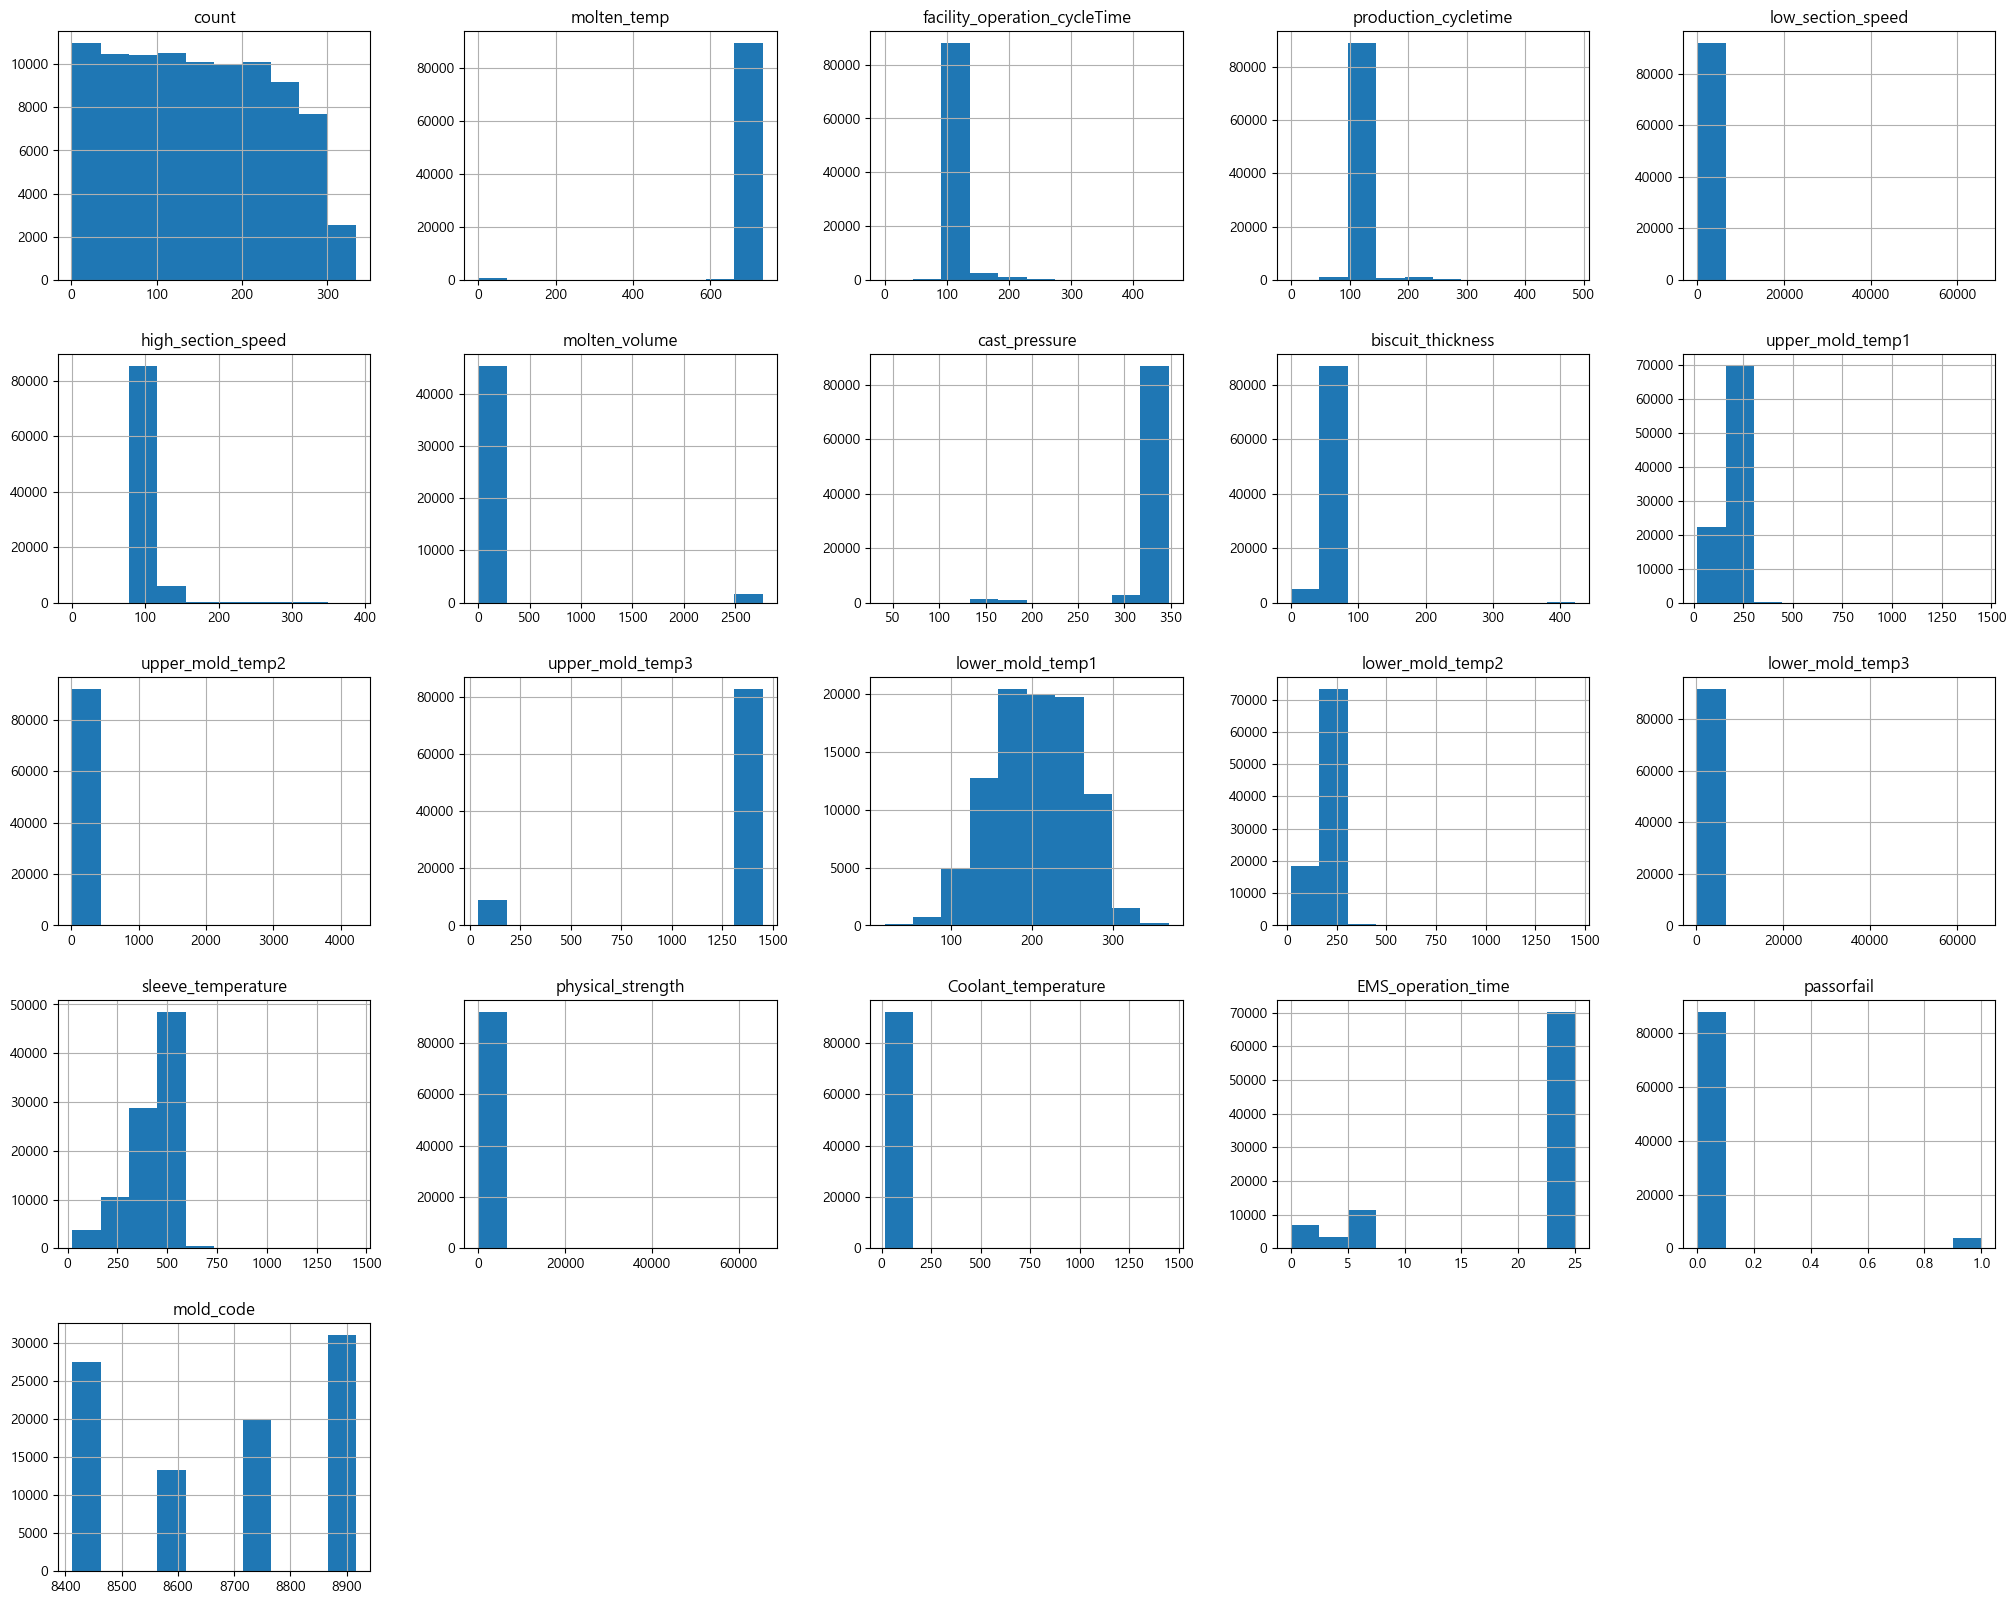

In [118]:
data.hist(figsize=(25,20))
plt.show()

- 코드 4를 통해 각 변수별 히스토그램으로 데이터 값 분포를 확인한다.
- 본 시각화를 통해 정규분포에서 크게 벗어난 경우 이상치 존재여부를 확인할 수 있다.

#### 👌 양품, 불량 개수 및 불량률 확인

In [119]:
pass_count = len(data[data['passorfail']== 0])
fail_count = len(data[data['passorfail']== 1])
print('양품 개수 : ', pass_count)
print('불량 개수 : ', fail_count)
print('불량률 :', fail_count/(fail_count+pass_count)*100)

양품 개수 :  87998
불량 개수 :  4016
불량률 : 4.364553220162149


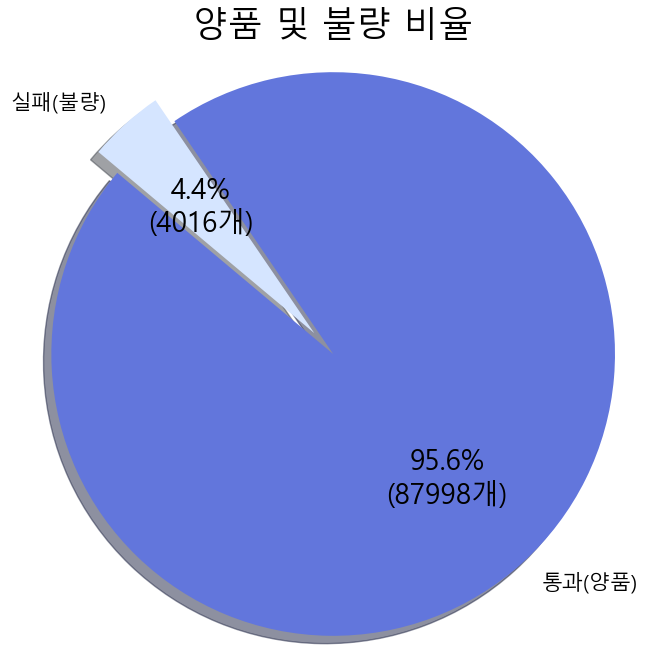

In [123]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 정상 출력 설정
# 데이터 프레임에서 passorfail 열을 기준으로 양품 개수와 불량 개수 계산
pass_count = len(data[data['passorfail'] == 0])
fail_count = len(data[data['passorfail'] == 1])

# 파이차트 데이터 준비
labels = ['통과(양품)', '실패(불량)']
sizes = [pass_count, fail_count]
colors = ['#6276dc', '#d5e5ff']
explode = (0.1, 0)  # 양품 파이를 약간 분리하여 강조

# 퍼센트와 개수를 함께 표시하는 함수
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d}개)'.format(p=pct, v=val)
    return my_format

# 글꼴 크기 설정
plt.rc('font', size=20)  # 기본 글꼴 크기
plt.rc('axes', titlesize=25)  # 제목 글꼴 크기
plt.rc('axes', labelsize=20)  # x, y축 레이블 글꼴 크기
plt.rc('xtick', labelsize=15)  # x축 틱 라벨 글꼴 크기
plt.rc('ytick', labelsize=20)  # y축 틱 라벨 글꼴 크기

# 파이차트 생성
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format(sizes), shadow=True, startangle=140)
plt.axis('equal')  # 파이를 원형으로 유지

# 제목 추가
plt.title('양품 및 불량 비율')

# 차트 출력
plt.show()


금형코드별 불량률:
mold_code
8412    0.034651
8413    0.037454
8573    0.043768
8576    0.050441
8600    0.050676
8722    0.054270
8917    0.043327
Name: passorfail, dtype: float64

전체 불량률: 4.36%


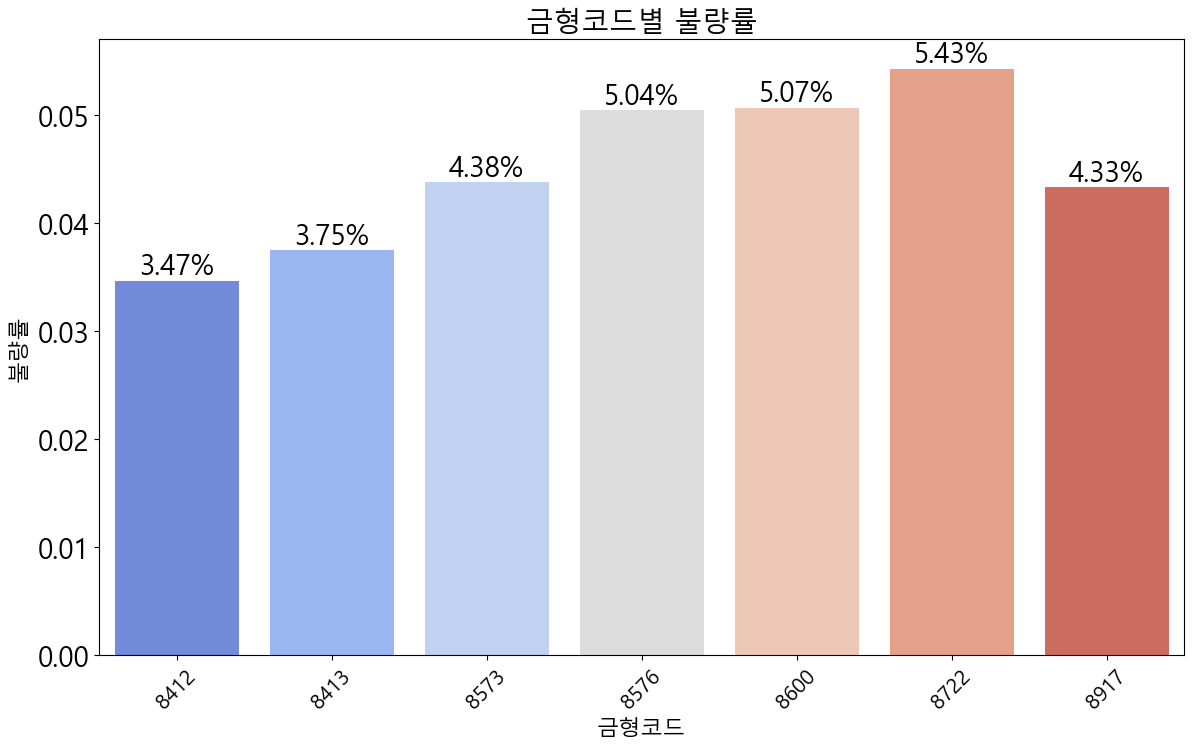

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 불러오기

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 정상 출력 설정

# 금형코드(mold_code)별 불량률 계산
grouped = casting.groupby('mold_code')

# 각 그룹 내에서 불량률 (passorfail 값이 1인 항목의 비율) 계산
불량률 = grouped['passorfail'].apply(lambda x: (x == 1).sum() / x.count())

# 전체 불량률 계산
전체_불량률 = (casting['passorfail'] == 1).sum() / casting['passorfail'].count()

# 불량률 출력
print("금형코드별 불량률:")
print(불량률)
print(f"\n전체 불량률: {전체_불량률 * 100:.2f}%")

# 금형코드별 불량률 시각화
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=불량률.index, y=불량률.values, palette='coolwarm')
plt.title('금형코드별 불량률', fontsize=20)
plt.xlabel('금형코드', fontsize=16)
plt.ylabel('불량률', fontsize=16)
plt.xticks(rotation=45)

# 막대에 불량률 퍼센트 표시
for p in barplot.patches:
    barplot.annotate(f'{p.get_height() * 100:.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.show()


In [83]:
data = casting

#### 👌 숫자형 변수만 사용하기

In [84]:
use_col = data.dtypes[data.dtypes!='object'].index
data = data[use_col]
data

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


- 숫자형 타입 변수만 추출하여 데이터프레임을 재구성한다.
- 숫자형이 아닌 변수로는 학습할 수가 없기 때문에 일반적으로 문자형을 숫자형으로
바꾸거나 숫자형만 사용한다. 여기서는 필요한 데이터가 숫자형이므로 ‘object’타입
(문자형)이 아닌 변수로 데이터를 재구성한다

In [85]:
use_col

Index(['count', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'molten_volume', 'cast_pressure', 'biscuit_thickness',
       'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3',
       'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3',
       'sleeve_temperature', 'physical_strength', 'Coolant_temperature',
       'EMS_operation_time', 'passorfail', 'mold_code'],
      dtype='object')

In [86]:
data_copy = data.copy()
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


#### 👌데이터 정제

In [87]:
data_copy.drop('molten_volume', axis=1, inplace=True)
data_copy.dropna(axis=0, inplace=True)
data_copy.reset_index(drop=True, inplace=True)
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,73,731.0,119,120,109.0,125.0,177.0,48.0,24.0,33.0,1449.0,30.0,273.0,1449.0,479.0,708.0,35.0,23,1.0,8722
2,1,731.0,119,123,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,323.0,1449.0,513.0,700.0,35.0,23,1.0,8722
3,2,731.0,119,124,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,343.0,1449.0,531.0,708.0,34.0,23,1.0,8722
4,3,731.0,120,124,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,343.0,1449.0,544.0,707.0,34.0,23,1.0,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89436,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
89437,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
89438,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
89439,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [70]:
#data_copy = data_copy.interpolate()

In [90]:
for col in data_copy.dtypes[data_copy.dtypes!='object'].index:
    UCL = np.percentile(data_copy[col], 99.9)
    LCL = np.percentile(data_copy[col], 0.1)
    data_copy = data_copy[(data_copy[col] <= UCL) & (data_copy[col] >= LCL)]
    data_copy.reset_index(drop=True, inplace=True)
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,126,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,126,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [91]:
data_copy.head(3)

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573


양품집단과 불량집단간의 T-test

In [93]:
t_test = []
for i, col in enumerate(data_copy.columns):
    t=scipy.stats.ttest_ind(data_copy[data_copy['passorfail']==1][col], data_copy[data_copy['passorfail']==0][col],
                            equal_var=False)
    t_test.append([col, t[0], t[1]])

df_ttest = pd.DataFrame(t_test, columns=['col', 'tvalue', 'pvalue'])
use_t_list = []
for i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] < 0.1:
        use_t_list.append(df_ttest['col'][i])
df_ttest

,col,tvalue,pvalue
0,count,-45.044308,0.000000e+00
1,molten_temp,3.786891,1.552251e-04
2,facility_operation_cycleTime,0.830063,4.065656e-01
3,production_cycletime,-16.718089,3.974998e-60
4,low_section_speed,-17.048564,2.804018e-62
5,high_section_speed,7.086440,1.706243e-12
6,cast_pressure,-63.993068,0.000000e+00
7,biscuit_thickness,3.641038,2.761401e-04
8,upper_mold_temp1,-48.991533,0.000000e+00
9,upper_mold_temp2,-51.139842,0.000000e+00


In [ ]:
data_copy = data_copy[use_t_list]
data_copy

,일자별 제품 생산 번호,용탕온도,제품생산 사이클 시간,저속구간속도,고속구간속도,주조압력,비스켓 두께,상금형온도1,상금형온도2,상금형온도3,하금형온도1,하금형온도2,하금형온도3,슬리브온도,형체력,냉각수 온도,전자교반 가동시간,양품불량판정,금형코드
0,32,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [95]:
data_copy.drop(['count', 'EMS_operation_time', 'mold_code'], axis=1, inplace=True)
data_copy

,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,passorfail
0,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,0.0
1,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,1.0
2,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,1.0
3,731.0,126,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,1.0
4,731.0,126,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0.0
87255,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0.0
87256,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0.0
87257,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0.0


In [96]:
data_copy

,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,passorfail
0,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,0.0
1,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,1.0
2,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,1.0
3,731.0,126,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,1.0
4,731.0,126,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0.0
87255,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0.0
87256,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0.0
87257,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0.0


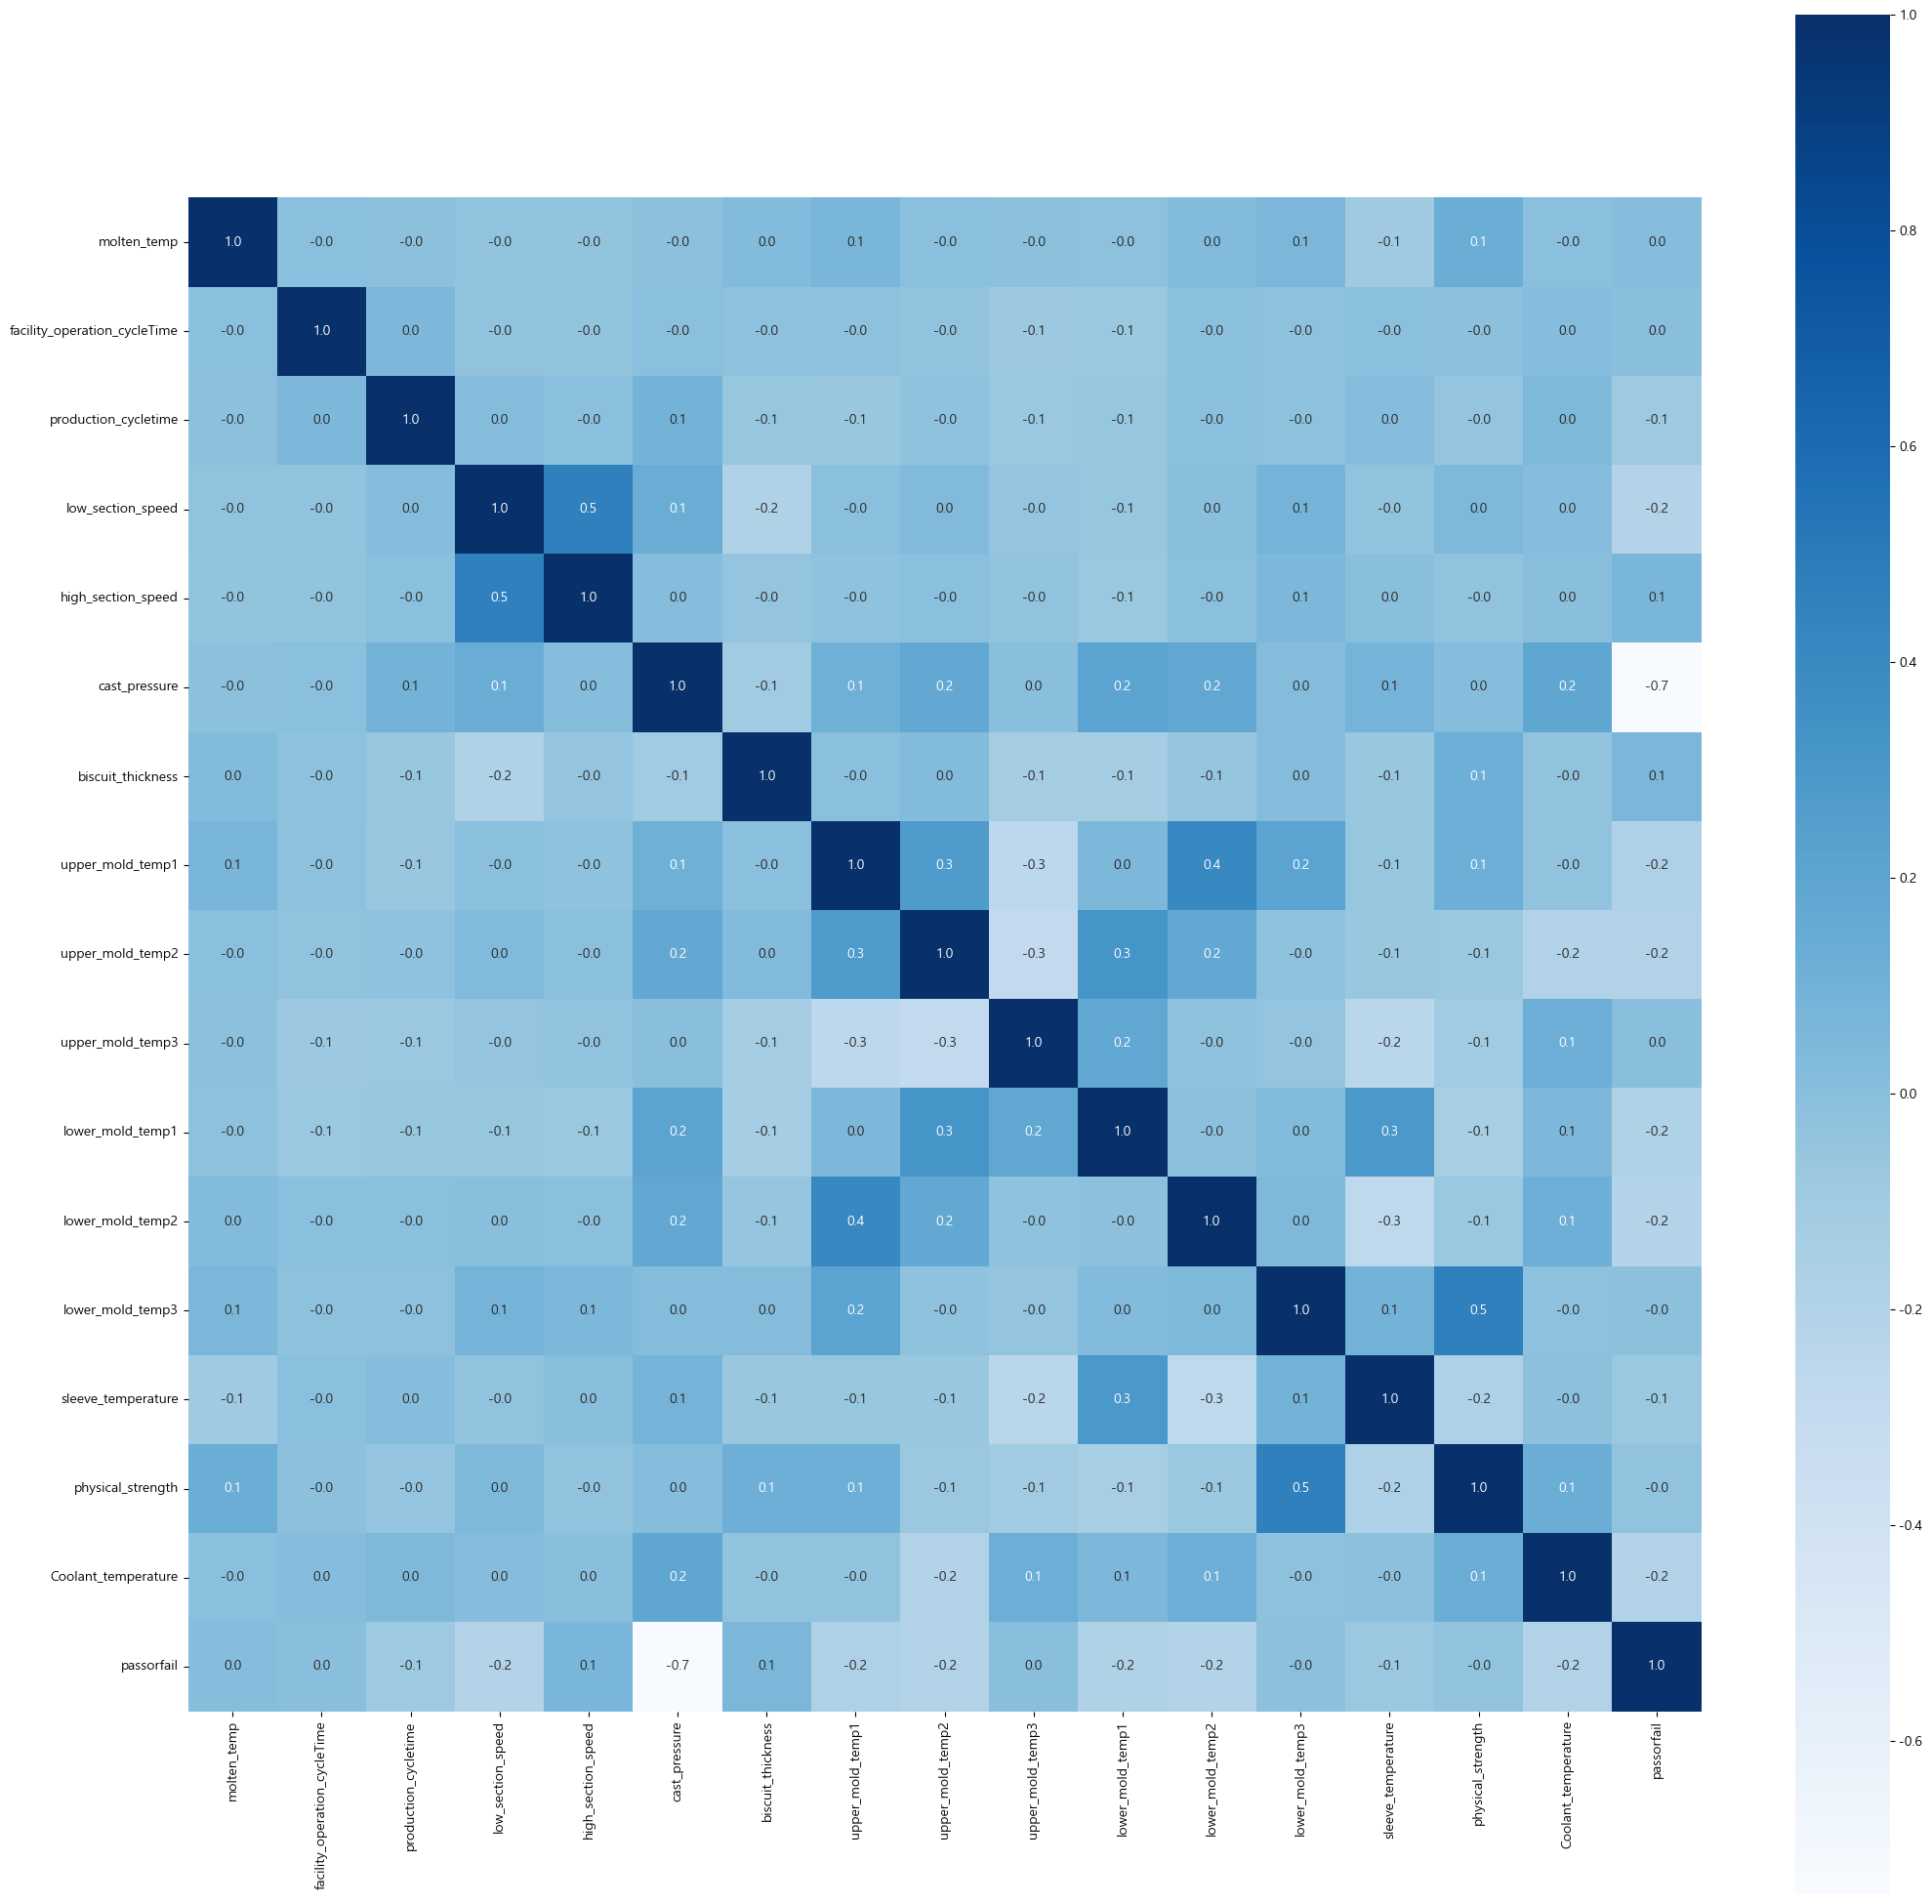

In [97]:
plt.figure(figsize=(25, 25))
sns.heatmap(data_copy.corr(), annot = True, fmt = '.1f', square = True, cmap = 'Blues')
plt.show()

#### 👌 알고리즘 선택(MODELING)

In [98]:
X = data_copy.drop('passorfail', axis=1).values
y = data_copy['passorfail'].values

In [99]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2)

원본 데이터 클래스 비율: Counter({0.0: 84267, 1.0: 2992})
SMOTE 적용 후 데이터 클래스 비율: Counter({0.0: 84267, 1.0: 84267})


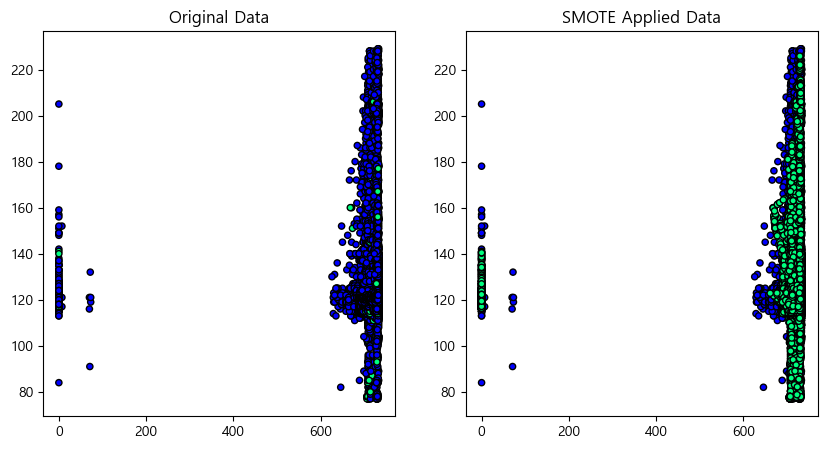

In [100]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
print("원본 데이터 클래스 비율:", Counter(y))

# SMOTE 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("SMOTE 적용 후 데이터 클래스 비율:", Counter(y_res))

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k', s=20)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, cmap='winter', edgecolor='k', s=20)
plt.title('SMOTE Applied Data')
plt.show()

In [102]:
mms = MinMaxScaler()

원본 데이터 클래스 비율: Counter({0.0: 84267, 1.0: 2992})
RandomOverSampler 적용 후 데이터 클래스 비율: Counter({0.0: 84267, 1.0: 84267})


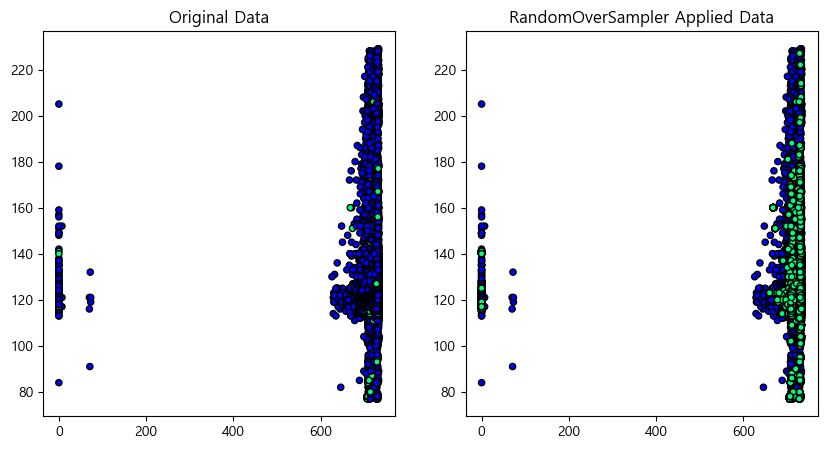

In [104]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt

print("원본 데이터 클래스 비율:", Counter(y))

# RandomOverSampler 적용
ros = RandomOverSampler(random_state=42)
X_res1, y_res1 = ros.fit_resample(X, y)

print("RandomOverSampler 적용 후 데이터 클래스 비율:", Counter(y_res1))

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k', s=20)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_res1[:, 0], X_res1[:, 1], c=y_res1, cmap='winter', edgecolor='k', s=20)
plt.title('RandomOverSampler Applied Data')
plt.show()


##### 👌XGB 모델 학습 및 결과, SMOTE O

In [103]:
#smote
xgb_clf = XGBClassifier(random_state=42)
xgb_fold_f1 = []
n_iter = 0
print('모델 :', xgb_clf)
idx_list = []
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    xgb_clf.fit(X_train_scaled, y_train)
    valid_pred = xgb_clf.predict(X_valid_scaled)
    test_pred = xgb_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    xgb_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    xgb_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

모델 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9988127040664886
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.9964381121994658
교차검증 중 가장 높은 정확도 : Split 1 0.9964381121994658
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.9988499350769801
StratifiedShuffleS

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, eval_metric='error', use_label_encoder=False)
lgbm_clf = LGBMClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)

In [108]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 모델 초기화
svm_clf = SVC(kernel='linear', random_state=42)
mms = MinMaxScaler()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

svm_fold_f1 = []
svm_fold_specificity = []
svm_fold_accuracy = []
n_iter = 0
print('모델 :', svm_clf)

# 데이터셋 분리 및 모델 교차 검증
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]

    # 데이터 스케일링
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)

    # SVM 모델 훈련
    svm_clf.fit(X_train_scaled, y_train)

    # 예측 및 성능 평가
    valid_pred = svm_clf.predict(X_valid_scaled)
    test_pred = svm_clf.predict(X_test_scaled)

    # 계산된 메트릭스
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_test, test_pred)

    n_iter += 1
    svm_fold_f1.append([n_iter, test_f1])
    svm_fold_specificity.append([n_iter, specificity])
    svm_fold_accuracy.append([n_iter, accuracy])

    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 특이도 : {specificity}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정확도 : {accuracy}')
    print('='*50)

# 교차검증 중 가장 높은 정확도, 특이도, F1 스코어 출력
svm_fold_f1.sort(key=lambda x: x[1], reverse=True)
svm_fold_specificity.sort(key=lambda x: x[1], reverse=True)
svm_fold_accuracy.sort(key=lambda x: x[1], reverse=True)
print(f'교차검증 중 가장 높은 F1 정확도 : Split {svm_fold_f1[0][0]} {svm_fold_f1[0][1]}')
print(f'교차검증 중 가장 높은 특이도 : Split {svm_fold_specificity[0][0]} {svm_fold_specificity[0][1]}')
print(f'교차검증 중 가장 높은 정확도 : Split {svm_fold_accuracy[0][0]} {svm_fold_accuracy[0][1]}')


모델 : SVC(kernel='linear', random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9111143824525247
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.9124138784603325
StratifiedShuffleSplit 1 테스트 데이터 특이도 : 0.9572010600846486
StratifiedShuffleSplit 1 테스트 데이터 정확도 : 0.9160222305729713
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.9111274871039057
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.9120713504139397
StratifiedShuffleSplit 2 테스트 데이터 특이도 : 0.9577927215189873
StratifiedShuffleSplit 2 테스트 데이터 정확도 : 0.9157651154051542
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 0.9112265375988667
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.9112633620867555
StratifiedShuffleSplit 3 테스트 데이터 특이도 : 0.9565286183299712
StratifiedShuffleSplit 3 테스트 데이터 정확도 : 0.9149542137220388
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9099019260309582
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.9125663863115043
StratifiedShuffleSplit 4 테스트 데이터 특이도 : 0.959256329113924
StratifiedShuffleSplit 4 테스트 데이터 정확도 : 0.9163189019204525
Stratified

In [109]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 모델 초기화
svm_clf = SVC(kernel='linear', random_state=42)
mms = MinMaxScaler()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

svm_fold_f1 = []
svm_fold_specificity = []
svm_fold_accuracy = []
svm_fold_recall = []
svm_fold_precision = []
n_iter = 0
print('모델 :', svm_clf)

# 데이터셋 분리 및 모델 교차 검증
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # 데이터 스케일링
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)

    # SVM 모델 훈련
    svm_clf.fit(X_train_scaled, y_train)

    # 예측 및 성능 평가
    test_pred = svm_clf.predict(X_test_scaled)

    # 계산된 메트릭스
    test_f1 = f1_score(y_test, test_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
    test_specificity = tn / (tn + fp)

    n_iter += 1
    svm_fold_f1.append([n_iter, test_f1])
    svm_fold_specificity.append([n_iter, test_specificity])
    svm_fold_accuracy.append([n_iter, test_accuracy])
    svm_fold_recall.append([n_iter, test_recall])
    svm_fold_precision.append([n_iter, test_precision])

    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정확도 : {test_accuracy}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 특이도 : {test_specificity}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 재현율 : {test_recall}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정밀도 : {test_precision}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 F1 정확도 : {test_f1}')
    print('='*50)

# 각 메트릭별로 가장 높은 값 출력
print(f'교차검증 중 가장 높은 정확도 : Split {max(svm_fold_accuracy, key=lambda x: x[1])[0]} {max(svm_fold_accuracy, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 특이도 : Split {max(svm_fold_specificity, key=lambda x: x[1])[0]} {max(svm_fold_specificity, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 재현율 : Split {max(svm_fold_recall, key=lambda x: x[1])[0]} {max(svm_fold_recall, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 정밀도 : Split {max(svm_fold_precision, key=lambda x: x[1])[0]} {max(svm_fold_precision, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 F1 스코어 : Split {max(svm_fold_f1, key=lambda x: x[1])[0]} {max(svm_fold_f1, key=lambda x: x[1])[1]}')


모델 : SVC(kernel='linear', random_state=42)
StratifiedShuffleSplit 1 테스트 데이터 정확도 : 0.9160222305729713
StratifiedShuffleSplit 1 테스트 데이터 특이도 : 0.9572010600846486
StratifiedShuffleSplit 1 테스트 데이터 재현율 : 0.8748417721518987
StratifiedShuffleSplit 1 테스트 데이터 정밀도 : 0.9533580481075955
StratifiedShuffleSplit 1 테스트 데이터 F1 정확도 : 0.9124138784603325
StratifiedShuffleSplit 2 테스트 데이터 정확도 : 0.9157651154051542
StratifiedShuffleSplit 2 테스트 데이터 특이도 : 0.9577927215189873
StratifiedShuffleSplit 2 테스트 데이터 재현율 : 0.8737391717099798
StratifiedShuffleSplit 2 테스트 데이터 정밀도 : 0.9539212299188116
StratifiedShuffleSplit 2 테스트 데이터 F1 정확도 : 0.9120713504139397
StratifiedShuffleSplit 3 테스트 데이터 정확도 : 0.9149542137220388
StratifiedShuffleSplit 3 테스트 데이터 특이도 : 0.9565286183299712
StratifiedShuffleSplit 3 테스트 데이터 재현율 : 0.873378164556962
StratifiedShuffleSplit 3 테스트 데이터 정밀도 : 0.9525843472258176
StratifiedShuffleSplit 3 테스트 데이터 F1 정확도 : 0.9112633620867555
StratifiedShuffleSplit 4 테스트 데이터 정확도 : 0.9163189019204525
StratifiedShuffleSpli

##### 👌 LogisticRegression 모델 학습 및 결과, SMOTE O

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 모델 초기화
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # 로지스틱 회귀 모델 인스턴스 생성
mms = MinMaxScaler()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

log_reg_fold_f1 = []
log_reg_fold_specificity = []
log_reg_fold_accuracy = []
log_reg_fold_recall = []
log_reg_fold_precision = []
n_iter = 0
print('모델 :', log_reg)

# 데이터셋 분리 및 모델 교차 검증
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # 데이터 스케일링
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)

    # 로지스틱 회귀 모델 훈련
    log_reg.fit(X_train_scaled, y_train)

    # 예측 및 성능 평가
    test_pred = log_reg.predict(X_test_scaled)

    # 계산된 메트릭스
    test_f1 = f1_score(y_test, test_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
    test_specificity = tn / (tn + fp)

    n_iter += 1
    log_reg_fold_f1.append([n_iter, test_f1])
    log_reg_fold_specificity.append([n_iter, test_specificity])
    log_reg_fold_accuracy.append([n_iter, test_accuracy])
    log_reg_fold_recall.append([n_iter, test_recall])
    log_reg_fold_precision.append([n_iter, test_precision])

    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정확도 : {test_accuracy}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 특이도 : {test_specificity}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 재현율 : {test_recall}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정밀도 : {test_precision}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 F1 정확도 : {test_f1}')
    print('='*50)

# 각 메트릭별로 가장 높은 값 출력
print(f'교차검증 중 가장 높은 정확도 : Split {max(log_reg_fold_accuracy, key=lambda x: x[1])[0]} {max(log_reg_fold_accuracy, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 특이도 : Split {max(log_reg_fold_specificity, key=lambda x: x[1])[0]} {max(log_reg_fold_specificity, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 재현율 : Split {max(log_reg_fold_recall, key=lambda x: x[1])[0]} {max(log_reg_fold_recall, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 정밀도 : Split {max(log_reg_fold_precision, key=lambda x: x[1])[0]} {max(log_reg_fold_precision, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 F1 스코어 : Split {max(log_reg_fold_f1, key=lambda x: x[1])[0]} {max(log_reg_fold_f1, key=lambda x: x[1])[1]}')


모델 : LogisticRegression(max_iter=1000, random_state=42)
StratifiedShuffleSplit 1 테스트 데이터 정확도 : 0.9140444215897628
StratifiedShuffleSplit 1 테스트 데이터 특이도 : 0.9563308413433013
StratifiedShuffleSplit 1 테스트 데이터 재현율 : 0.8717563291139241
StratifiedShuffleSplit 1 테스트 데이터 정밀도 : 0.9522945294270159
StratifiedShuffleSplit 1 테스트 데이터 F1 정확도 : 0.9102474082028831
StratifiedShuffleSplit 2 테스트 데이터 정확도 : 0.9125610648523566
StratifiedShuffleSplit 2 테스트 데이터 특이도 : 0.9560522151898734
StratifiedShuffleSplit 2 테스트 데이터 재현율 : 0.8690716348245718
StratifiedShuffleSplit 2 테스트 데이터 정밀도 : 0.9518672558703752
StratifiedShuffleSplit 2 테스트 데이터 F1 정확도 : 0.9085871430639125
StratifiedShuffleSplit 3 테스트 데이터 정확도 : 0.9124621744031961
StratifiedShuffleSplit 3 테스트 데이터 특이도 : 0.955500177999288
StratifiedShuffleSplit 3 테스트 데이터 재현율 : 0.8694224683544304
StratifiedShuffleSplit 3 테스트 데이터 정밀도 : 0.9513071329639889
StratifiedShuffleSplit 3 테스트 데이터 F1 정확도 : 0.9085234788359788
StratifiedShuffleSplit 4 테스트 데이터 정확도 : 0.913629081703289
Stratifie

##### 👌 AdaBoostClassifier 모델 학습 및 결과, SMOTE O

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 모델 초기화
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
mms = MinMaxScaler()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

ada_fold_f1 = []
ada_fold_specificity = []
ada_fold_accuracy = []
ada_fold_recall = []
ada_fold_precision = []
n_iter = 0
print('모델 :', ada_clf)

# 데이터셋 분리 및 모델 교차 검증
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # 데이터 스케일링
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)

    # AdaBoost 모델 훈련
    ada_clf.fit(X_train_scaled, y_train)

    # 예측 및 성능 평가
    test_pred = ada_clf.predict(X_test_scaled)

    # 계산된 메트릭스
    test_f1 = f1_score(y_test, test_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
    test_specificity = tn / (tn + fp)

    n_iter += 1
    ada_fold_f1.append([n_iter, test_f1])
    ada_fold_specificity.append([n_iter, test_specificity])
    ada_fold_accuracy.append([n_iter, test_accuracy])
    ada_fold_recall.append([n_iter, test_recall])
    ada_fold_precision.append([n_iter, test_precision])

    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정확도 : {test_accuracy}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 특이도 : {test_specificity}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 재현율 : {test_recall}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정밀도 : {test_precision}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 F1 정확도 : {test_f1}')
    print('='*50)

# 각 메트릭별로 가장 높은 값 출력
print(f'교차검증 중 가장 높은 정확도 : Split {max(ada_fold_accuracy, key=lambda x: x[1])[0]} {max(ada_fold_accuracy, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 특이도 : Split {max(ada_fold_specificity, key=lambda x: x[1])[0]} {max(ada_fold_specificity, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 재현율 : Split {max(ada_fold_recall, key=lambda x: x[1])[0]} {max(ada_fold_recall, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 정밀도 : Split {max(ada_fold_precision, key=lambda x: x[1])[0]} {max(ada_fold_precision, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 F1 스코어 : Split {max(ada_fold_f1, key=lambda x: x[1])[0]} {max(ada_fold_f1, key=lambda x: x[1])[1]}')


모델 : AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)
StratifiedShuffleSplit 1 테스트 데이터 정확도 : 0.9529874804691363
StratifiedShuffleSplit 1 테스트 데이터 특이도 : 0.9728649974288992
StratifiedShuffleSplit 1 테스트 데이터 재현율 : 0.9331091772151898
StratifiedShuffleSplit 1 테스트 데이터 정밀도 : 0.971740473738414
StratifiedShuffleSplit 1 테스트 데이터 F1 정확도 : 0.9520330945414185
StratifiedShuffleSplit 2 테스트 데이터 정확도 : 0.9486560787959099
StratifiedShuffleSplit 2 테스트 데이터 특이도 : 0.9705696202531645
StratifiedShuffleSplit 2 테스트 데이터 재현율 : 0.9267434041374946
StratifiedShuffleSplit 2 테스트 데이터 정밀도 : 0.9692218590989947
StratifiedShuffleSplit 2 테스트 데이터 F1 정확도 : 0.9475067739717716
StratifiedShuffleSplit 3 테스트 데이터 정확도 : 0.9479045113822907
StratifiedShuffleSplit 3 테스트 데이터 특이도 : 0.9711641153435386
StratifiedShuffleSplit 3 테스트 데이터 재현율 : 0.9246439873417721
StratifiedShuffleSplit 3 테스트 데이터 정밀도 : 0.9697560570859608
StratifiedShuffleSplit 3 테스트 데이터 F1 정확도 : 0.9466628867649441
StratifiedShuff

##### 👌 RandomForestClassifier 모델 학습 및 결과, SMOTE O

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 모델 초기화
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mms = MinMaxScaler()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

rf_fold_f1 = []
rf_fold_specificity = []
rf_fold_accuracy = []
rf_fold_recall = []
rf_fold_precision = []
n_iter = 0
print('모델 :', rf_clf)

# 데이터셋 분리 및 모델 교차 검증
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # 데이터 스케일링
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)

    # 랜덤 포레스트 모델 훈련
    rf_clf.fit(X_train_scaled, y_train)

    # 예측 및 성능 평가
    test_pred = rf_clf.predict(X_test_scaled)

    # 계산된 메트릭스
    test_f1 = f1_score(y_test, test_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
    test_specificity = tn / (tn + fp)

    n_iter += 1
    rf_fold_f1.append([n_iter, test_f1])
    rf_fold_specificity.append([n_iter, test_specificity])
    rf_fold_accuracy.append([n_iter, test_accuracy])
    rf_fold_recall.append([n_iter, test_recall])
    rf_fold_precision.append([n_iter, test_precision])

    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정확도 : {test_accuracy}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 특이도 : {test_specificity}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 재현율 : {test_recall}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 정밀도 : {test_precision}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 F1 정확도 : {test_f1}')
    print('='*50)

# 각 메트릭별로 가장 높은 값 출력
print(f'교차검증 중 가장 높은 정확도 : Split {max(rf_fold_accuracy, key=lambda x: x[1])[0]} {max(rf_fold_accuracy, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 특이도 : Split {max(rf_fold_specificity, key=lambda x: x[1])[0]} {max(rf_fold_specificity, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 재현율 : Split {max(rf_fold_recall, key=lambda x: x[1])[0]} {max(rf_fold_recall, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 정밀도 : Split {max(rf_fold_precision, key=lambda x: x[1])[0]} {max(rf_fold_precision, key=lambda x: x[1])[1]}')
print(f'교차검증 중 가장 높은 F1 스코어 : Split {max(rf_fold_f1, key=lambda x: x[1])[0]} {max(rf_fold_f1, key=lambda x: x[1])[1]}')


모델 : RandomForestClassifier(random_state=42)
StratifiedShuffleSplit 1 테스트 데이터 정확도 : 0.9959850477640869
StratifiedShuffleSplit 1 테스트 데이터 특이도 : 0.9936711364265655
StratifiedShuffleSplit 1 테스트 데이터 재현율 : 0.9982990506329114
StratifiedShuffleSplit 1 테스트 데이터 정밀도 : 0.9937000433122022
StratifiedShuffleSplit 1 테스트 데이터 F1 정확도 : 0.9959942380172464
StratifiedShuffleSplit 2 테스트 데이터 정확도 : 0.9959454915844228
StratifiedShuffleSplit 2 테스트 데이터 특이도 : 0.99375
StratifiedShuffleSplit 2 테스트 데이터 재현율 : 0.9981408963253036
StratifiedShuffleSplit 2 테스트 데이터 정밀도 : 0.9937775677378702
StratifiedShuffleSplit 2 테스트 데이터 F1 정확도 : 0.9959544530617883
StratifiedShuffleSplit 3 테스트 데이터 정확도 : 0.9963014972014003
StratifiedShuffleSplit 3 테스트 데이터 특이도 : 0.9943435781812429
StratifiedShuffleSplit 3 테스트 데이터 재현율 : 0.9982594936708861
StratifiedShuffleSplit 3 테스트 데이터 정밀도 : 0.9943654202293235
StratifiedShuffleSplit 3 테스트 데이터 F1 정확도 : 0.9963086519670741
StratifiedShuffleSplit 4 테스트 데이터 정확도 : 0.9958268230454302
StratifiedShuffleSplit 4 테스트 

##### 👌 DecisionTreeClassifier 모델 학습 및 결과, SMOTE X

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_fold_f1 = []
n_iter = 0
print('모델 :', dt_clf)
idx_list = []
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    dt_clf.fit(X_train_scaled, y_train)
    
    valid_pred = dt_clf.predict(X_valid_scaled)
    test_pred = dt_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    dt_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {dt_fold_f1[0][0]} {dt_fold_f1[0][1]}')

모델 : DecisionTreeClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8293487221764221
교차검증 중 가장 높은 정확도 : Split 1 0.8293487221764221
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8344594594594594
교차검증 중 가장 높은 정확도 : Split 2 0.8344594594594594
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.834162520729685
교차검증 중 가장 높은 정확도 : Split 2 0.8344594594594594
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.835421888053467
교차검증 중 가장 높은 정확도 : Split 4 0.835421888053467
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8287841191066997
교차검증 중 가장 높은 정확도 : Split 4 0.835421888053467


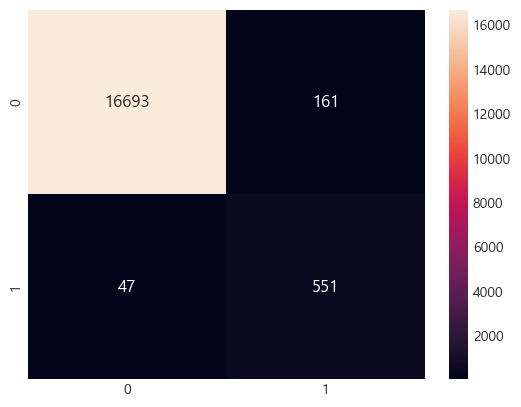

In [ ]:
dt_clf.fit(X[idx_list[dt_fold_f1[0][0]-1][0]], y[idx_list[dt_fold_f1[0][0]-1][0]])
pred = dt_clf.predict(X[idx_list[dt_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[dt_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

##### 👌 RandomForestClassifier 모델 학습 및 결과, SMOTE X

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_fold_f1 = []
n_iter = 0
print('모델 :', rf_clf)
idx_list = []
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    rf_clf.fit(X_train_scaled, y_train)
    valid_pred = rf_clf.predict(X_valid_scaled)
    test_pred = rf_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    rf_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {rf_fold_f1[0][0]} {rf_fold_f1[0][1]}')

모델 : RandomForestClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8823529411764706
교차검증 중 가장 높은 정확도 : Split 1 0.8823529411764706
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8699551569506726
교차검증 중 가장 높은 정확도 : Split 1 0.8823529411764706
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.8620378719567178
교차검증 중 가장 높은 정확도 : Split 1 0.8823529411764706
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.8738738738738739
교차검증 중 가장 높은 정확도 : Split 1 0.8823529411764706
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8752260397830018
교차검증 중 가장 높은 정확도 : Split 1 0.8823529411764706


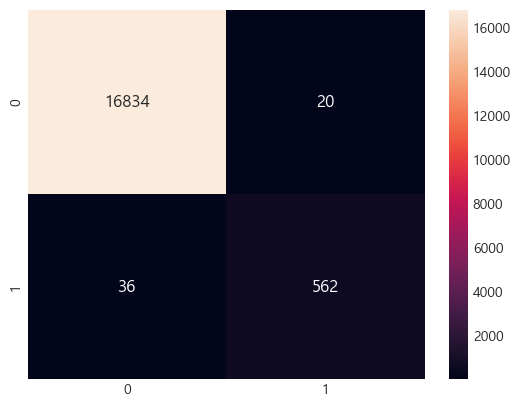

In [ ]:
rf_clf.fit(X[idx_list[rf_fold_f1[0][0]-1][0]], y[idx_list[rf_fold_f1[0][0]-1][0]])
pred = rf_clf.predict(X[idx_list[rf_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[rf_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

##### 👌 LGBMClassifier 모델 학습 및 결과, SMOTE X

In [ ]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_fold_f1 = []
n_iter = 0
print('모델 :', lgbm_clf)
idx_list = []
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    lgbm_clf.fit(X_train_scaled, y_train)
    valid_pred = lgbm_clf.predict(X_valid_scaled)
    test_pred = lgbm_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    lgbm_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    lgbm_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {lgbm_fold_f1[0][0]} {lgbm_fold_f1[0][1]}')

모델 : LGBMClassifier(random_state=42)
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 69807, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034295 -> initscore=-3.337872
[LightGBM] [Info] Start training from score -3.337872
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9548387096774195
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8952879581151832
교차검증 중 가장 높은 정확도 : Split 1 0.8952879581151832
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data poin

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


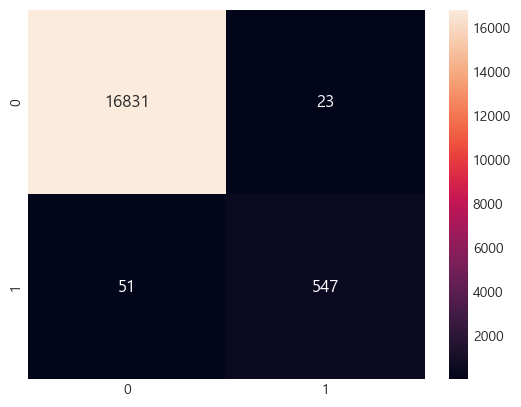

In [ ]:
lgbm_clf.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
pred = lgbm_clf.predict(X[idx_list[lgbm_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[lgbm_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

##### 👌 XGBClassifier 모델 학습 및 결과, SMOTE X

In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_fold_f1 = []
n_iter = 0
print('모델 :', xgb_clf)
idx_list = []
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    xgb_clf.fit(X_train_scaled, y_train)
    valid_pred = xgb_clf.predict(X_valid_scaled)
    test_pred = xgb_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    xgb_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    xgb_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

모델 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9733759318423856
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8948740225890529
교차검증 중 가장 높은 정확도 : Split 1 0.8948740225890529
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.9700214132762313
StratifiedShuffleS

-양품은 16,854개 중 30개를 불량으로 예측하고 불량은 598개 중 50개를 양품으로 예측했음을 확인할 수 있다.

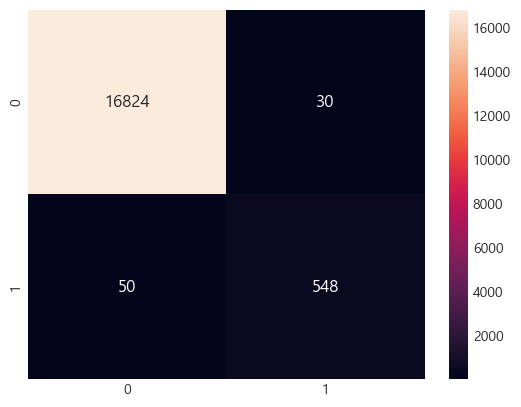

In [ ]:
xgb_clf.fit(X[idx_list[xgb_fold_f1[0][0]-1][0]], y[idx_list[xgb_fold_f1[0][0]-1][0]])
pred = xgb_clf.predict(X[idx_list[xgb_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[xgb_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

- 평균 F1 스코어가 가장 높았던 LightGBM 모델의 Permutation Importance 결과를 확인한다.
- ‘cast_pressure’와 ‘lower_mold_temp2’ 변수가 중요도가 높은 것으로 확인된다.
-  변수의 중요도가 높다는 것은 해당 변수가 양품, 불량으로 분류하는데 영향도가 높다는 것을 의미한다

##### 👌 PermutationImportance 

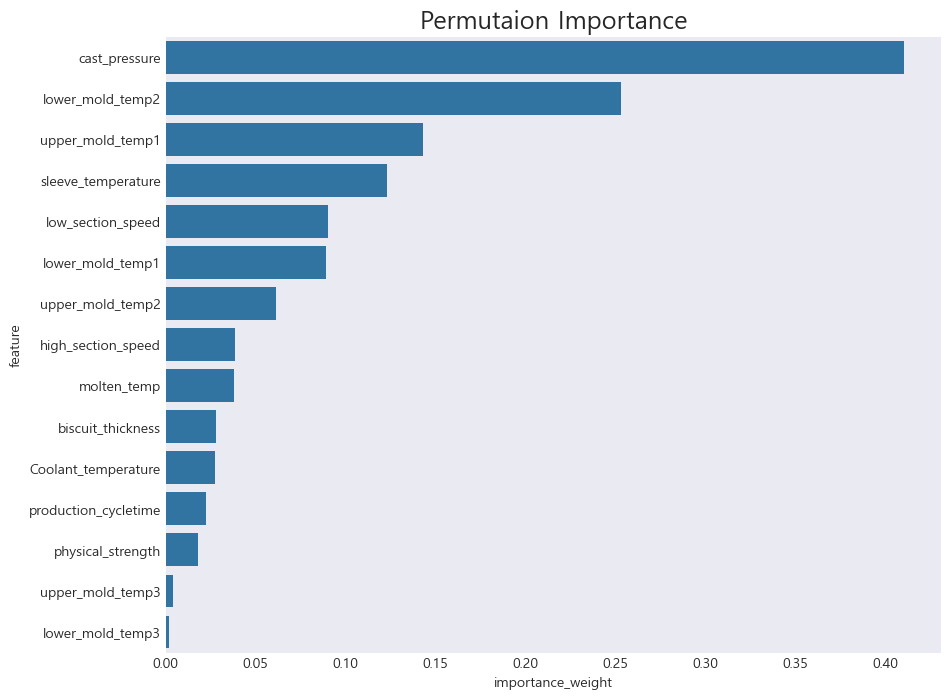

In [ ]:
pi = PermutationImportance(lgbm_clf, scoring='f1', n_iter=30)
pi.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
permu_df = pd.DataFrame()
permu_df["feature"] = data_copy.columns[:-1]
permu_df["importance_weight"] = pi.feature_importances_
permu_df.sort_values(by='importance_weight', ascending=False, inplace=True)
permu_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance_weight', y='feature', data=permu_df)
plt.title('Permutaion Importance', fontsize=18)
plt.show()

pip install graphviz


- LightGBM 모델의 트리를 시각화하여 각 변수에서 어떤 기준에 따라 양품과 불량으로 분류하는지 확인한다.
- 앞서 교차검증 결과 가장 F1 스코어가 높았던 split 4번 데이터로 트리를 시각화한다.
-  교차검증을 위해 분할한 데이터는 넘파이 어레이 형태로 되어있어 그대로 트리를 시각화하게 되면 칼럼명을 확인할 수가 없다.- 그래서 split 4의 데이터에 칼럼명을 부여한 데이터프레임 tmp를 생성한 후 진행한다.
- 트리의 구성요소는 아래와 같다.

- 👌최상단의 루트 노드를 보면 cast_pressure 변수 값이 299.5 이하면 불량으로 판단한다.
-  사용된 샘플 55845개 중 299.5를 기준으로 54700개를 양품으로 1145개를 불량으로 분류하였다.
-  cast_pressure, upper_mold_tmp1 등 주요변수들이 트리 시각화에서도 양품과 불량을 판정하는데 영향을 미쳤음을 확인할 수 있다

- 주요 변수들의 분류 기준과 해당 변수들의 통계값을 조합한 양품 생산을 위한 최적조건으로 

- cast_pressure는 299.5 초과 338미만
- upper_mold_temp1는 89.5초과 312미만
- low_section_speed는 50.0초과 140미만
- 55845개 중 53045개를 양품으로 분류함을 확인하였고, 위의 조건으로 해당 변수들을 통제하여 공정의 최적화가 가능하다.

##### 👌 트리 시각화 

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


<Axes: >

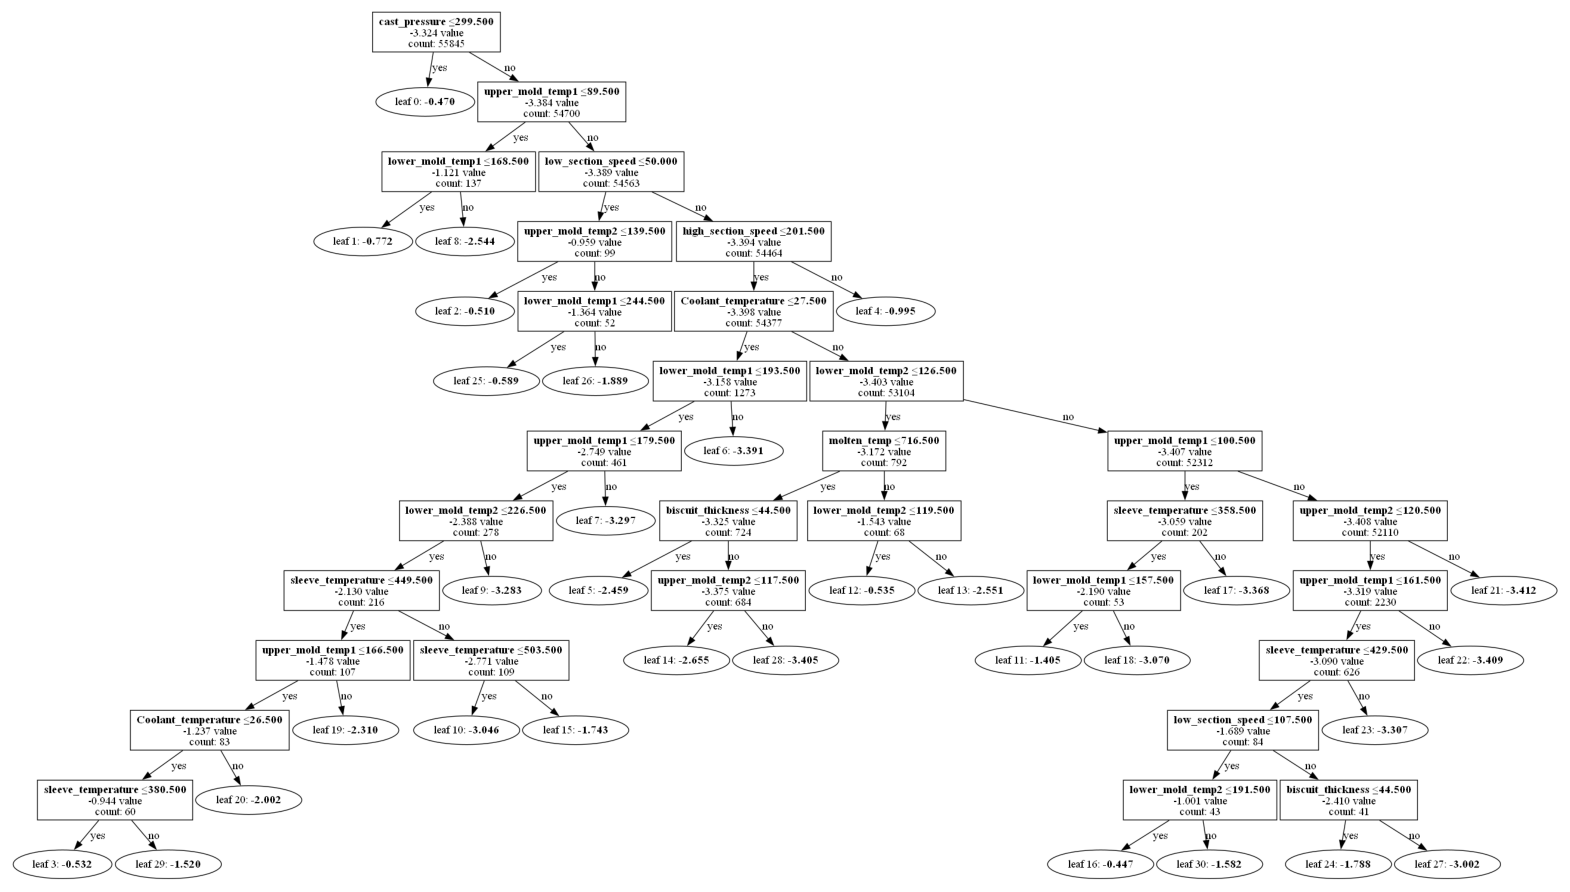

In [ ]:
lgbm = LGBMClassifier(random_state=42)
tmp = pd.DataFrame(X[idx_list[lgbm_fold_f1[0][0]-1][0]], columns=data_copy.columns[:-1])
lgbm.fit(tmp, y[idx_list[lgbm_fold_f1[0][0]-1][0]])
lightgbm.plot_tree(lgbm,dpi=100,orientation='vertical',figsize=(20,15), show_info=['internal_value','internal_count'])

##### 👌 PDP

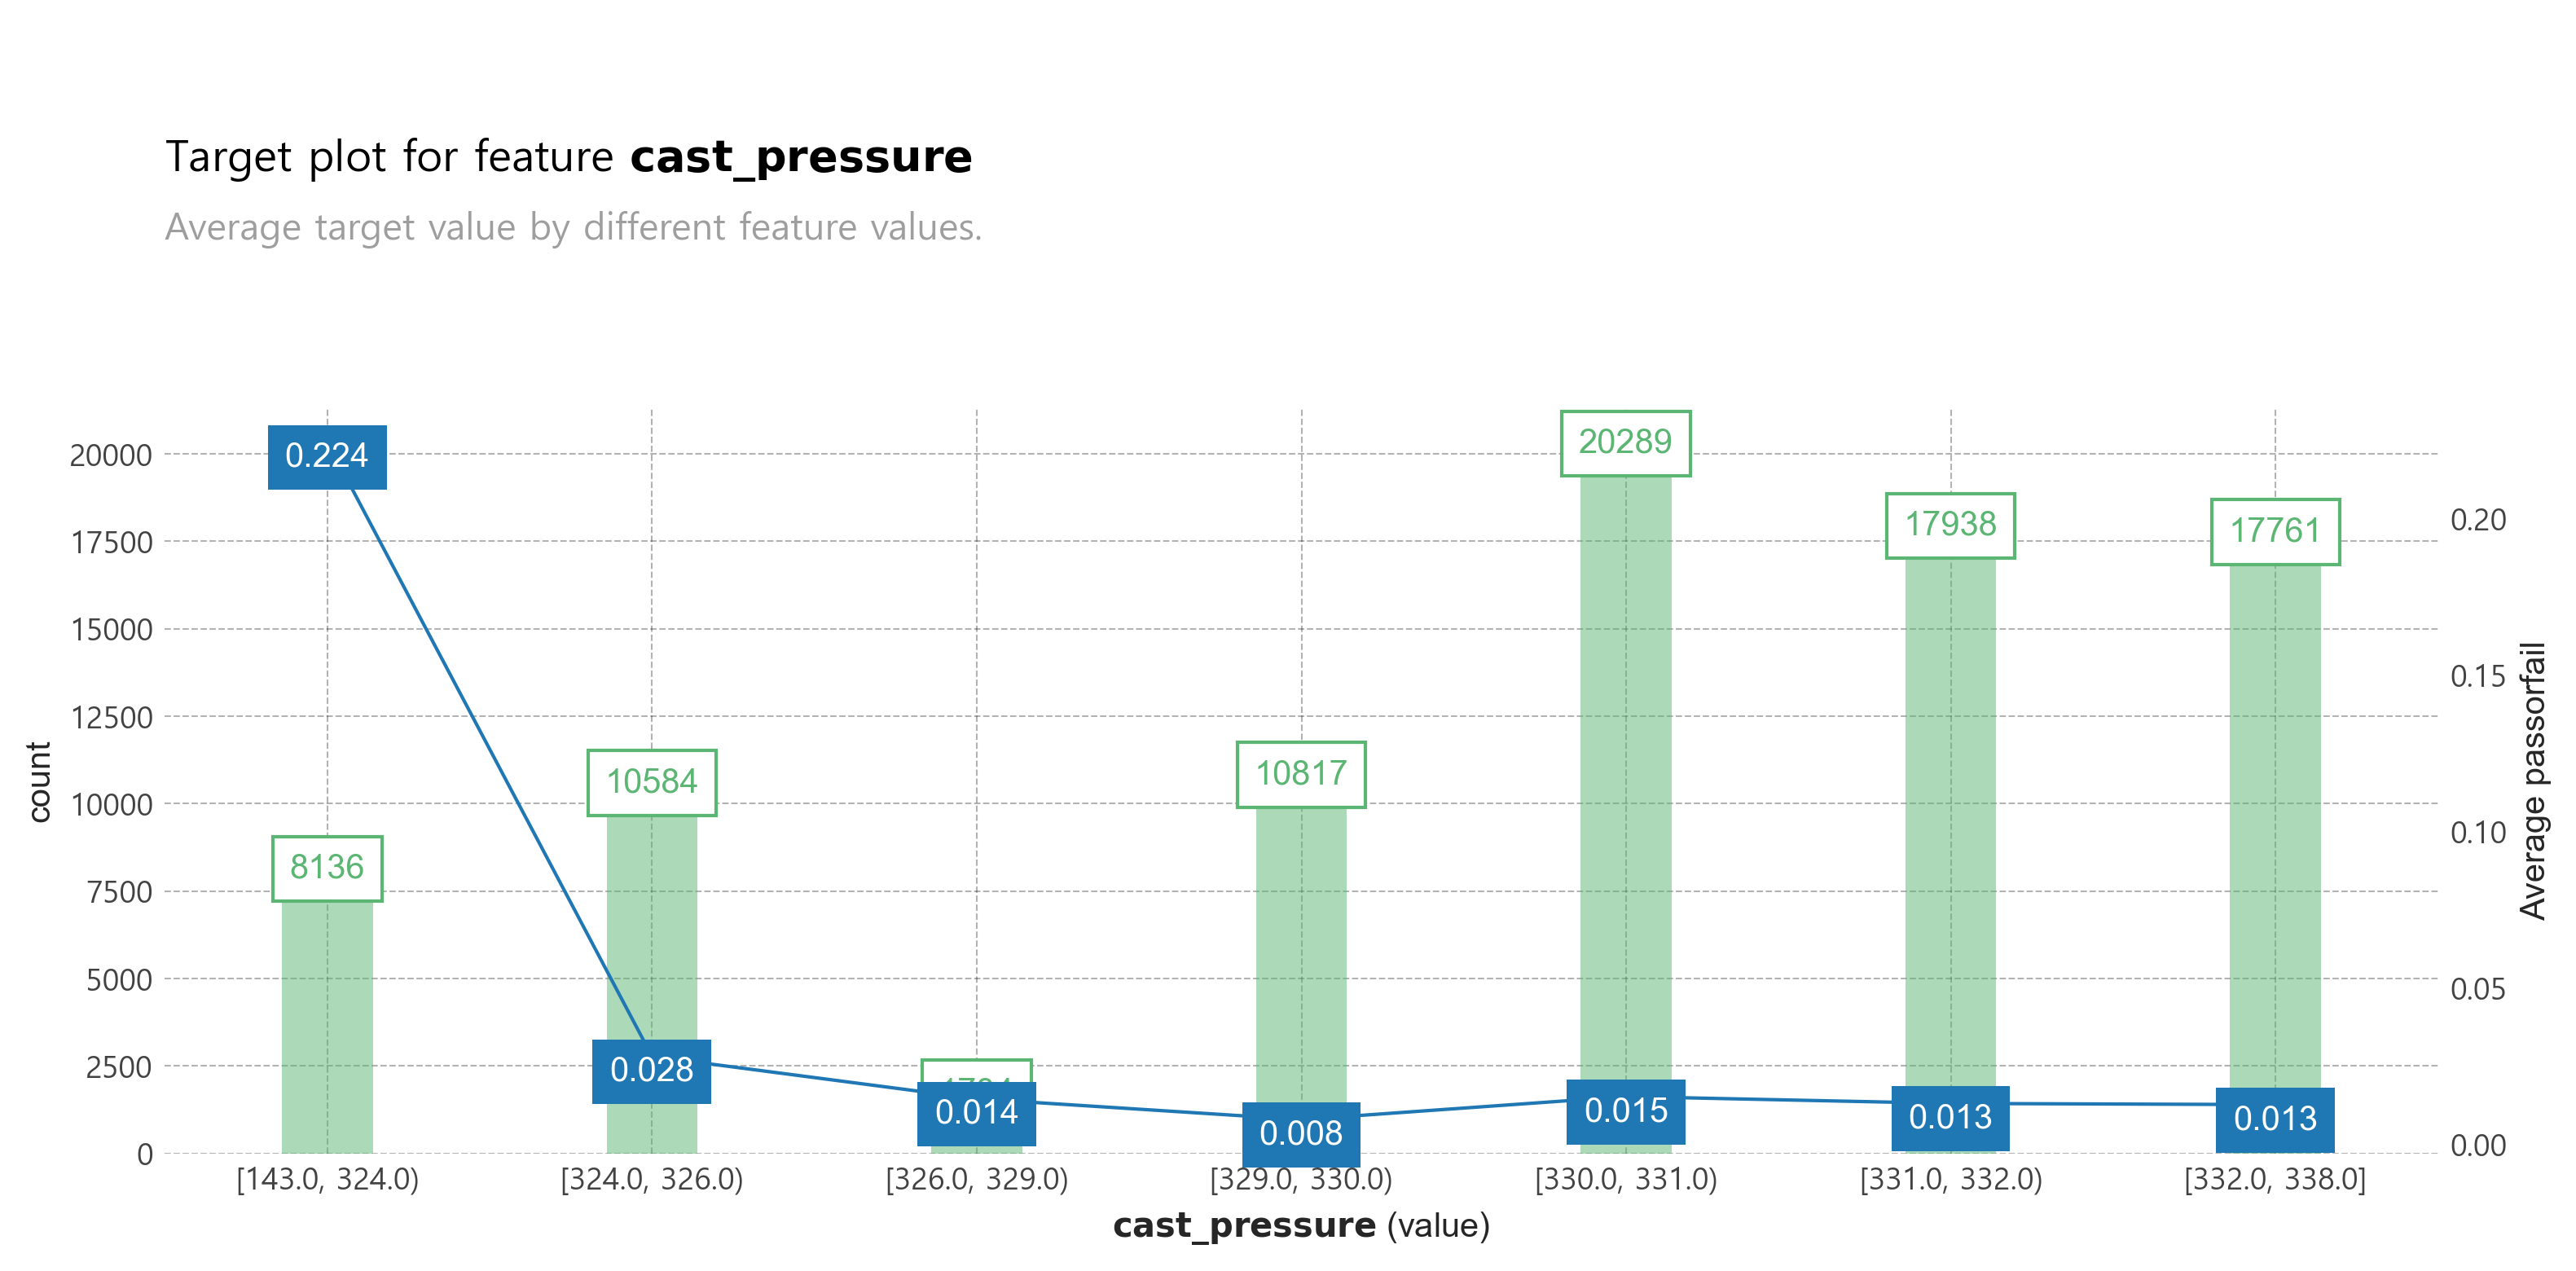

In [ ]:
from pdpbox import info_plots
target_plot2 = info_plots.TargetPlot(
    df=data_copy,
    feature='cast_pressure',
    feature_name='cast_pressure',
    target='passorfail',
)

fig2, axes2, summary_df2 = target_plot2.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)



'count', 'EMS_operation_time', 'mold_code','passorfail''molten_volume'

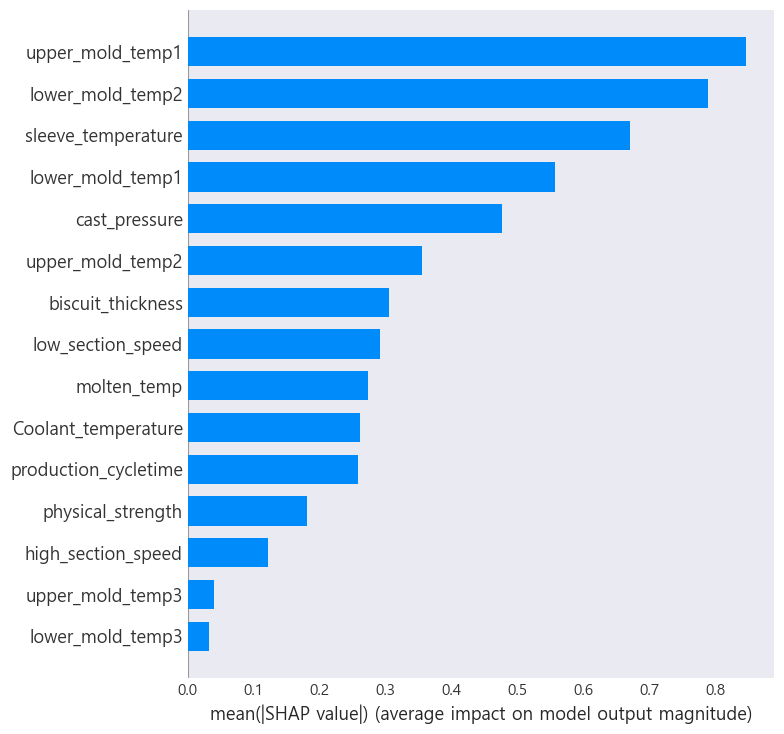

In [ ]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = data_copy.drop('passorfail', axis=1).values
y = data_copy['passorfail'].values

# 특성 이름
feature_names = data_copy.drop('passorfail', axis=1).columns

# XGBoost 모델 훈련
model = xgb.XGBClassifier()
model.fit(X, y)

# SHAP 값 생성
explainer = shap.Explainer(model)
shap_values = explainer(X)

# SHAP 요약 플롯, 특성 이름 사용
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar")


##### 👌 shap 

In [128]:
shap.summary_plot(shap_values, X, feature_names=feature_names)

NameError: name 'shap' is not defined

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.967577 to fit


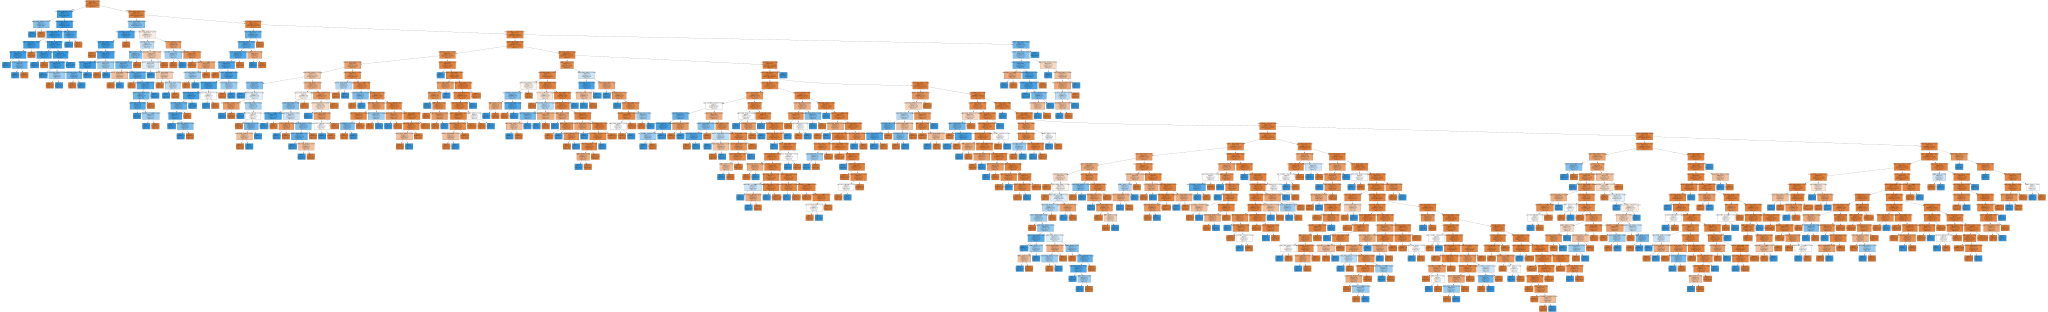

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Decision Tree 모델을 dot 파일로 저장
export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=['0', '1'],
                feature_names=data_copy.columns[:-1], 
                impurity=True, 
                filled=True)

# tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

# dot_graph 문자열에서 그래프 크기를 설정
dot_graph = dot_graph.replace('size="5,5!"', 'size="8,8!"')  # 원하는 크기로 조정

# 그래프 출력
src = graphviz.Source(dot_graph, format='png')
src.render('tree', format='png', view=True)

# Jupyter Notebook 상에서 출력
src


count가 연속적이다가 불연속적으로 값이 바뀌는 순간이 있거든, mold_code가 8722인것들을 count가 연속적인 애들별로 구분

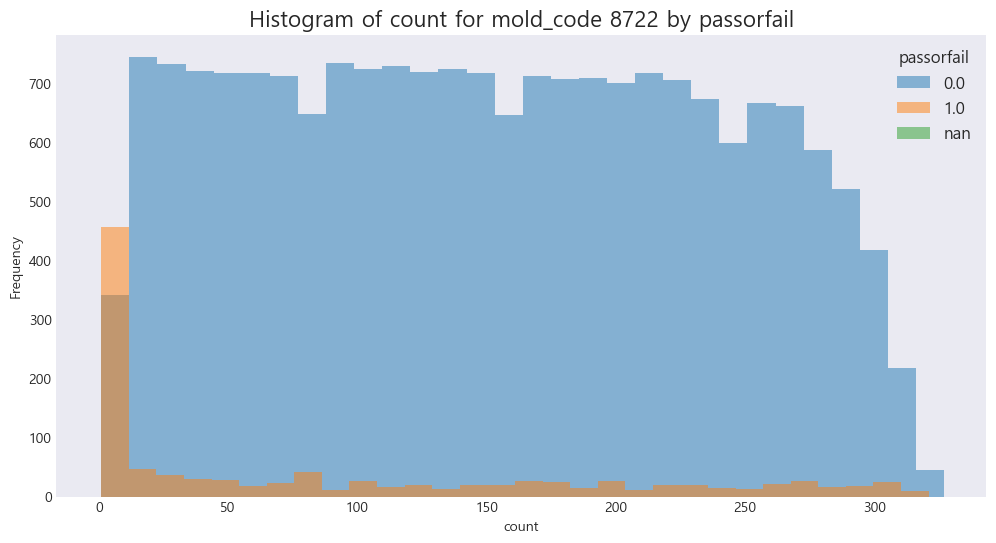

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (로컬 파일 경로 사용)

# 'mold_code'가 8722인 데이터 필터링
mold_8722 = data[data['mold_code'] == 8722]

# 'passorfail' 값을 기준으로 'count' 히스토그램 그리기
plt.figure(figsize=(12, 6))

for label in mold_8722['passorfail'].unique():
    subset = mold_8722[mold_8722['passorfail'] == label]
    plt.hist(subset['count'], bins=30, alpha=0.5, label=f'{label}')

plt.title('Histogram of count for mold_code 8722 by passorfail')
plt.xlabel('count')
plt.ylabel('Frequency')
plt.legend(title='passorfail')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_}")

Fitting 10 folds for each of 3888 candidates, totalling 38880 fits


KeyboardInterrupt: 

In [ ]:
# 최적 하이퍼파라미터 설정
best_params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 500,
    'subsample': 0.8
}

In [ ]:
# XGBClassifier 인스턴스 생성
xgb_clf = XGBClassifier(random_state=42, **best_params)
xgb_fold_f1 = []
n_iter = 0
idx_list = []

print('모델 :', xgb_clf)

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx_inner, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
        break  # inner loop에서 첫번째 split만 사용
    
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)

    xgb_clf.fit(X_train_scaled, y_train)
    valid_pred = xgb_clf.predict(X_valid_scaled)
    test_pred = xgb_clf.predict(X_test_scaled)

    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)

    n_iter += 1
    xgb_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    xgb_fold_f1.sort(key=lambda x: x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도 : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

모델 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8989547038327527
교차검증 중 가장 높은 정확도 : Split 1 0.8989547038327527
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 2 테스트 

#### 👌 결측치 시각화

In [ ]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import klib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("casting.csv", encoding='cp949', index_col=0)

In [ ]:
use_col = data.dtypes[data.dtypes!='object'].index
data = data[use_col]

- object 타입의 열을 전부 제거.

In [ ]:
# 결측치 시각화
klib.missingval_plot(data)

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy = data_copy.drop(columns=['molten_volume'])

In [ ]:
# 제외할 열 이름 목록
exclude_columns = ['molten_temp', 'upper_mold_temp3', 'lower_mold_temp3']

# 제외할 열을 제외한 나머지 열 이름 가져오기
columns_to_check = [col for col in data_copy.columns if col not in exclude_columns]

# 특정 열을 제외하고 나머지 열의 결측치 제거
data_copy.dropna(axis=0, subset=columns_to_check, inplace=True)

# 인덱스 재설정
data_copy.reset_index(drop=True, inplace=True)

In [ ]:
klib.missingval_plot(data_copy)

- 가로축은 열, 세로축은 인덱스를 나타낸다.

In [ ]:
# 결측치가 있는 인덱스 범위를 출력하는 코드

nan_indices = data_copy[data_copy['molten_temp'].isna()].index

first_nan_index = nan_indices.min() if not nan_indices.empty else None
last_nan_index = nan_indices.max() if not nan_indices.empty else None

print(f"First NaN index in 'molten_temp': {first_nan_index}")
print(f"Last NaN index in 'molten_temp': {last_nan_index}")

In [ ]:
unique_mold_codes = data_copy['mold_code'].unique()
unique_mold_codes

In [ ]:
# 특정 값을 y축에 표시하기 위한 목록
y_ticks = [8722, 8412, 8573, 8917, 8600, 8413, 8576]

plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['mold_code'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Mold Code')
plt.yticks(y_ticks)  # y축에 특정 값 표시
plt.show()

In [ ]:
data_copy.info()

In [ ]:
plt.figure(figsize=(20, 6))

# 기본 그래프 그리기
plt.plot(data_copy.index, data_copy['count'], linestyle='', marker='o', markersize=1, color='black')

# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)

# 축 레이블과 제목 설정
plt.xlabel('Index')
plt.ylabel('count')

# 그래프 표시
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['molten_temp'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# x축 범위 지정
# plt.xlim(10390, 10590)
plt.ylim(600, 750)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['facility_operation_cycleTime'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('facility_operation_cycleTime')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['production_cycletime'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.xlim(11500, 20000)
plt.xlabel('Index')
plt.ylabel('production_cycletime')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['low_section_speed'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylim(-50, 200)
plt.ylabel('low_section_speed')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['high_section_speed'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('high_section_speed')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['cast_pressure'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('cast_pressure')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['biscuit_thickness'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.ylim(0, 70)
plt.xlabel('Index')
plt.ylabel('biscuit_thickness')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.ylim(0, 300)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp1')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.ylim(0, 300)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp2')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.ylim(1447, 1450)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp3')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp1')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.ylim(0, 300)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp2')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.xlim(70000, 70100)
plt.ylim(0, 3000)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp3')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['sleeve_temperature'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
# plt.ylim(425, 540)
plt.xlabel('Index')
plt.ylabel('sleeve_temperature')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['physical_strength'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('physical_strength')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['Coolant_temperature'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.ylim(0, 60)
plt.xlabel('Index')
plt.ylabel('Coolant_temperature')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['EMS_operation_time'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(11895, 17598, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('EMS_operation_time')
plt.show()


👁️ 상금형3 하금형3 결측치 시각화

In [ ]:
data_copy.info()

In [ ]:
# 결측치가 있는 인덱스 범위를 출력하는 코드

nan_indices = data_copy[data_copy['lower_mold_temp3'].isna()].index

first_nan_index = nan_indices.min() if not nan_indices.empty else None
last_nan_index = nan_indices.max() if not nan_indices.empty else None

print(f"First NaN index in 'molten_temp': {first_nan_index}")
print(f"Last NaN index in 'molten_temp': {last_nan_index}")

In [ ]:
# 결측치가 있는 인덱스 범위를 출력하는 코드

nan_indices = data_copy[data_copy['upper_mold_temp3'].isna()].index

first_nan_index = nan_indices.min() if not nan_indices.empty else None
last_nan_index = nan_indices.max() if not nan_indices.empty else None

print(f"First NaN index in 'molten_temp': {first_nan_index}")
print(f"Last NaN index in 'molten_temp': {last_nan_index}")

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['count'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
# x축 범위 지정
# plt.xlim(10390, 10590)
# plt.ylim(600, 750)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['molten_temp'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['facility_operation_cycleTime'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['production_cycletime'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['low_section_speed'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['high_section_speed'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['cast_pressure'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['biscuit_thickness'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['sleeve_temperature'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['physical_strength'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['Coolant_temperature'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['EMS_operation_time'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['mold_code'], linestyle='', marker='o', markersize=1, color='black')
# 특정 인덱스 범위에 대한 배경 색칠
plt.axvspan(1, 655, color='red', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

👌 이상치 시각화

In [ ]:
data_copy.dropna(axis=0, inplace=True)
data_copy.reset_index(drop=True, inplace=True)

In [ ]:
data_copy.info()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['molten_temp'], linestyle='', marker='o', markersize=1, color='black')
plt.ylim(-100, 800)  # y축 범위를 0에서 800으로 지정
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['facility_operation_cycleTime'], linestyle='', marker='o', markersize=1, color='black')
plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('molten_temp')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['production_cycletime'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('production_cycletime')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['low_section_speed'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 300)
plt.xlabel('Index')
plt.ylabel('low_section_speed')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -1000
upper_bound = 60000

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['low_section_speed'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('low_section_speed')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['low_section_speed'] >= lower_bound) & (data_copy['low_section_speed'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['low_section_speed'], linestyle='', marker='o', markersize=1, color='black')
plt.ylim(-5000, 60000)
plt.xlabel('Index')
plt.ylabel('low_section_speed')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['high_section_speed'], linestyle='', marker='o', markersize=1, color='black')
plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('high_section_speed')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['cast_pressure'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('cast_pressure')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['biscuit_thickness'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('biscuit_thickness')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp1')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -50
upper_bound = 1200

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('upper_mold_temp1')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['upper_mold_temp1'] >= lower_bound) & (data_copy['upper_mold_temp1'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp2')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -50
upper_bound = 3000

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('upper_mold_temp2')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['upper_mold_temp2'] >= lower_bound) & (data_copy['upper_mold_temp2'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['upper_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('upper_mold_temp3')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp1'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp1')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp2')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -50
upper_bound = 600

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp2'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('lower_mold_temp2')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['lower_mold_temp2'] >= lower_bound) & (data_copy['lower_mold_temp2'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('lower_mold_temp3')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -1000
upper_bound = 10000

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['lower_mold_temp3'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('lower_mold_temp3')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['lower_mold_temp3'] >= lower_bound) & (data_copy['lower_mold_temp3'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['sleeve_temperature'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('sleeve_temperature')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['Coolant_temperature'], linestyle='', marker='o', markersize=1, color='black')
# plt.ylim(-100, 800)
plt.xlabel('Index')
plt.ylabel('Coolant_temperature')
plt.show()

In [ ]:
# lower_bound와 upper_bound를 수동으로 설정
lower_bound = -250
upper_bound = 200

# 플롯 생성
plt.figure(figsize=(20, 6))
plt.plot(data_copy.index, data_copy['Coolant_temperature'], linestyle='', marker='o', markersize=1, color='black')

# 경계값 선 추가
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1, label=f'Lower Bound = {lower_bound}')
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label=f'Upper Bound = {upper_bound}')

# 레이블 설정
plt.xlabel('Index')
plt.ylabel('Coolant_temperature')
plt.legend()
plt.show()

In [ ]:
data_copy = data_copy[(data_copy['Coolant_temperature'] >= lower_bound) & (data_copy['Coolant_temperature'] <= upper_bound)]

In [ ]:
X = data_copy.drop(['passorfail', 'EMS_operation_time', 'mold_code'], axis=1).values
y = data_copy['passorfail'].values

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
mms = MinMaxScaler()

In [ ]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='error', use_label_encoder=False)

In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_fold_f1 = []
n_iter = 0
print('모델 :', xgb_clf)
idx_list = []

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)
X_valid_scaled = mms.transform(X_valid)

xgb_clf.fit(X_train_scaled, y_train)
valid_pred = xgb_clf.predict(X_valid_scaled)
test_pred = xgb_clf.predict(X_test_scaled)

valid_f1 = f1_score(y_valid, valid_pred)
test_f1 = f1_score(y_test, test_pred)

n_iter += 1
xgb_fold_f1.append([n_iter, test_f1])
idx_list.append([train_idx, test_idx])

print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
print('='*50)
xgb_fold_f1.sort(key=lambda x : x[1], reverse=True)
print(f'교차검증 중 가장 높은 정확도 : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 특징(features)과 목표 변수(target variable) 정의
X = data_copy.drop(['passorfail', 'EMS_operation_time', 'mold_code'], axis=1).values
y = data_copy['passorfail']

# SMOTE를 사용하여 오버샘플링
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 정의 및 학습
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# 테스트 데이터 예측 및 평가
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 테스트 데이터 F1 스코어 계산
f1 = f1_score(y_test, y_pred)
print(f'테스트 데이터 F1 점수: {f1:.4f}')

### 👌 구간화

#### 👌 cast pressure구간화

In [ ]:
# np.histogram을 사용하여  cast_pressure 데이터를 5개 구간으로 나누고 경계값도 얻기
count, bin_dividers = np.histogram(data_copy['cast_pressure'], bins=9)

# pd.cut을 사용하여 각 데이터 포인트를 구간에 할당
data_copy['cast_pressure_bin'] = pd.cut(data_copy['cast_pressure'], bins=bin_dividers, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5','Bin6','Bin7','Bin8','Bin9'], include_lowest=True)

# 불량 여부를 나타내는 'Defect' 열 생성 (1은 불량, 0은 정상)
data_copy['Defect'] = data_copy['passorfail'] == 1  # 'Y' 열이 불량 여부를 나타내는 경우

# 각 구간에서의 불량률 계산
defect_rate = data_copy.groupby('cast_pressure_bin')['Defect'].mean()

# 결과 출력
print("cast_pressure 구간 경계값:")
for i in range(len(bin_dividers)-1):
    print(f"  Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}")

print("\n각 구간의 불량률:")
for bin_label, rate in defect_rate.items():
    print(f"  {bin_label}: {rate:.2%}")

In [ ]:
# Remove outliers for cast_pressure
lower_bound = data['cast_pressure'].quantile(0.001)
upper_bound = data['cast_pressure'].quantile(0.999)
data = data_copy[(data_copy['cast_pressure'] >= lower_bound) & (data_copy['cast_pressure'] <= upper_bound)]

# Divide cast_pressure into 10 bins and retrieve bin edges
count, bin_dividers = np.histogram(data_copy['cast_pressure'], bins=10)

# Assign data points to bins
bin_labels = [f'Bin{i+1}' for i in range(10)]
data['cast_pressure_bin'] = pd.cut(data['cast_pressure'], bins=bin_dividers, labels=bin_labels, include_lowest=True)

# Create 'Defect' column (1 for defects, 0 for non-defects)
data['Defect'] = data_copy['passorfail'] == 1

# Calculate defect rate per bin
defect_rate = data_copy.groupby('cast_pressure_bin')['Defect'].mean().reset_index()
defect_rate.columns = ['cast_pressure_bin', 'Defect_Rate']


# Visualization
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='cast_pressure_bin', y='Defect_Rate', data=defect_rate, palette='viridis')
plt.title('주조압력 구간별 불량률')
plt.xlabel('주조압력 구간')
plt.ylabel('불량률')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

##### 👌 bin8구간화

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'; 
plt.rcParams['axes.unicode_minus'] = False;

In [ ]:
# Bin9 데이터 추출
bin9_data = data_copy[data_copy['cast_pressure_bin'] == 'Bin9']

# Bin9을 다시 10개의 서브-빈으로 나눔
count_bin9, bin9_dividers = np.histogram(bin9_data['cast_pressure'], bins=10)

# Bin9 서브-빈 경계값 출력
print("\nBin9 구간의 경계값:")
for i in range(len(bin9_dividers) - 1):
    print(f"  Sub-Bin{i+1}: {bin9_dividers[i]:.2f} ~ {bin9_dividers[i+1]:.2f}")

# Bin9 내의 서브-빈에 데이터 포인트를 할당
sub_bin_labels = [f'Bin9_Sub{i+1}' for i in range(10)]
bin9_data['cast_pressure_sub_bin'] = pd.cut(bin9_data['cast_pressure'], bins=bin9_dividers, labels=sub_bin_labels, include_lowest=True)

# Bin9 내의 서브-빈별 결함률 계산
defect_rate_bin9 = bin9_data.groupby('cast_pressure_sub_bin')['Defect'].mean().reset_index()
defect_rate_bin9.columns = ['cast_pressure_sub_bin', 'Defect_Rate']

# 서브-빈 경계값과 불량률 출력
print("\nBin9 내 구간의 불량률:")
for i in range(len(bin9_dividers) - 1):
    print(f"  {sub_bin_labels[i]}: 경계값 ({bin9_dividers[i]}, {bin9_dividers[i+1]}), 불량률 {defect_rate_bin9.iloc[i]['Defect_Rate']:.2%}")

# 시각화
plt.figure(figsize=(12, 6))
bar_plot_bin9 = sns.barplot(x='cast_pressure_sub_bin', y='Defect_Rate', data=defect_rate_bin9, palette='viridis')
plt.title('Bin9 내의 주조압력 구간별 불량률')
plt.xlabel('Bin9 내의 주조압력 구간')
plt.ylabel('불량률')
plt.ylim(0, 1.1)
plt.show()

#### 👌 low section speed구간화

In [ ]:
# np.histogram을 사용하여  low_section_speed 데이터를 5개 구간으로 나누고 경계값도 얻기
count, bin_dividers = np.histogram(data_copy['low_section_speed'], bins=9)

# pd.cut을 사용하여 각 데이터 포인트를 구간에 할당
data_copy['low_section_speed_bin'] = pd.cut(data_copy['low_section_speed'], bins=bin_dividers, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5','Bin6','Bin7','Bin8','Bin9'], include_lowest=True)

# 불량 여부를 나타내는 'Defect' 열 생성 (1은 불량, 0은 정상)
data_copy['Defect'] = data_copy['passorfail'] == 1  # 'Y' 열이 불량 여부를 나타내는 경우

# 각 구간에서의 불량률 계산
defect_rate = data_copy.groupby('low_section_speed_bin')['Defect'].mean()

# 결과 출력
print("low_section_speed 구간 경계값:")
for i in range(len(bin_dividers)-1):
    print(f"  Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}")

print("\n각 구간의 불량률:")
for bin_label, rate in defect_rate.items():
    print(f"  {bin_label}: {rate:.2%}")

In [ ]:
# Remove outliers for cast_pressure
lower_bound = data['low_section_speed'].quantile(0.001)
upper_bound = data['low_section_speed'].quantile(0.999)
data = data_copy[(data_copy['low_section_speed'] >= lower_bound) & (data_copy['low_section_speed'] <= upper_bound)]

# Divide cast_pressure into 10 bins and retrieve bin edges
count, bin_dividers = np.histogram(data['low_section_speed'], bins=10)

# Assign data points to bins
bin_labels = [f'Bin{i+1}' for i in range(10)]
data['low_section_speed_bin'] = pd.cut(data['low_section_speed'], bins=bin_dividers, labels=bin_labels, include_lowest=True)

# Create 'Defect' column (1 for defects, 0 for non-defects)
data['Defect'] = data_copy['passorfail'] == 1

# Calculate defect rate per bin
defect_rate = data_copy.groupby('low_section_speed_bin')['Defect'].mean().reset_index()
defect_rate.columns = ['low_section_speed_bin', 'Defect_Rate']


# Visualization
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='low_section_speed_bin', y='Defect_Rate', data=defect_rate, palette='viridis')
plt.title('low section speed 구간별 불량률')
plt.xlabel('low section speed 구간')
plt.ylabel('불량률')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

##### 👌 bin4구간화

In [ ]:
# Bin4 데이터 추출
bin4_data = data_copy[data_copy['low_section_speed_bin'] == 'Bin4']

# Bin4을 다시 10개의 서브-빈으로 나눔
count_bin4, bin4_dividers = np.histogram(bin4_data['low_section_speed'], bins=10)

# Bin8 서브-빈 경계값 출력
print("Bin4 구간 경계값:", bin4_dividers)

# Bin8 내의 서브-빈에 데이터 포인트를 할당
sub_bin_labels = [f'Bin4_Sub{i+1}' for i in range(10)]
bin4_data['low_section_speed_bin'] = pd.cut(bin4_data['low_section_speed'], bins=bin4_dividers, labels=sub_bin_labels, include_lowest=True)

# Bin8 내의 서브-빈별 결함률 계산
defect_rate_bin4 = bin4_data.groupby('low_section_speed_bin')['Defect'].mean().reset_index()
defect_rate_bin4.columns = ['low_section_speed_bin', 'Defect_Rate']

# 서브-빈 경계값과 불량률 출력
for i in range(len(bin4_dividers)-1):
    print(f"{sub_bin_labels[i]}: 경계값 ({bin4_dividers[i]}, {bin4_dividers[i+1]}), 불량률 {defect_rate_bin4.iloc[i]['Defect_Rate']}")

# 시각화
plt.figure(figsize=(12, 6))
bar_plot_bin4 = sns.barplot(x='low_section_speed_bin', y='Defect_Rate', data=defect_rate_bin4, palette='viridis')
plt.title('Bin4 내의 low_section_speed 구간별 불량률')
plt.xlabel('Bin4 내의 low_section_speed 불량률')
plt.ylabel('불량률')
plt.ylim(0, 1.1)
plt.show()

#### 👌 low section speed구간화

In [ ]:
# np.histogram을 사용하여  low_section_speed 데이터를 5개 구간으로 나누고 경계값도 얻기
count, bin_dividers = np.histogram(data_copy['high_section_speed'], bins=9)

# pd.cut을 사용하여 각 데이터 포인트를 구간에 할당
data_copy['high_section_speed_bin'] = pd.cut(data_copy['high_section_speed'], bins=bin_dividers, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5','Bin6','Bin7','Bin8','Bin9'], include_lowest=True)

# 불량 여부를 나타내는 'Defect' 열 생성 (1은 불량, 0은 정상)
data_copy['Defect'] = data_copy['passorfail'] == 1  # 'Y' 열이 불량 여부를 나타내는 경우

# 각 구간에서의 불량률 계산
defect_rate = data_copy.groupby('high_section_speed_bin')['Defect'].mean()

# 결과 출력
print("high_section_speed 구간 경계값:")
for i in range(len(bin_dividers)-1):
    print(f"  Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}")

print("\n각 구간의 불량률:")
for bin_label, rate in defect_rate.items():
    print(f"  {bin_label}: {rate:.2%}")

In [ ]:
# Remove outliers for cast_pressure
lower_bound = data['high_section_speed'].quantile(0.001)
upper_bound = data['high_section_speed'].quantile(0.999)
data = data_copy[(data_copy['high_section_speed'] >= lower_bound) & (data_copy['high_section_speed'] <= upper_bound)]

# Divide cast_pressure into 10 bins and retrieve bin edges
count, bin_dividers = np.histogram(data['high_section_speed'], bins=10)

# Assign data points to bins
bin_labels = [f'Bin{i+1}' for i in range(10)]
data['high_section_speed_bin'] = pd.cut(data['high_section_speed'], bins=bin_dividers, labels=bin_labels, include_lowest=True)

# Create 'Defect' column (1 for defects, 0 for non-defects)
data['Defect'] = data_copy['passorfail'] == 1

# Calculate defect rate per bin
defect_rate = data_copy.groupby('high_section_speed_bin')['Defect'].mean().reset_index()
defect_rate.columns = ['high_section_speed_bin', 'Defect_Rate']


# Visualization
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='high_section_speed_bin', y='Defect_Rate', data=defect_rate, palette='viridis')
plt.title('high section speed 구간별 불량률')
plt.xlabel('high section speed 구간')
plt.ylabel('불량률')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

##### 👌 bin7구간화

In [ ]:
# Bin7 데이터 추출
bin7_data = data_copy[data_copy['high_section_speed_bin'] == 'Bin7']

# Bin7을 다시 10개의 서브-빈으로 나눔
count_bin7, bin7_dividers = np.histogram(bin7_data['high_section_speed'], bins=10)

# Bin8 서브-빈 경계값 출력
print("Bin7 구간 경계값:", bin7_dividers)

# Bin8 내의 서브-빈에 데이터 포인트를 할당
sub_bin_labels = [f'Bin7_Sub{i+1}' for i in range(10)]
bin7_data['high_section_speed_bin'] = pd.cut(bin7_data['high_section_speed'], bins=bin7_dividers, labels=sub_bin_labels, include_lowest=True)

# Bin8 내의 서브-빈별 결함률 계산
defect_rate_bin7 = bin7_data.groupby('high_section_speed_bin')['Defect'].mean().reset_index()
defect_rate_bin7.columns = ['high_section_speed_bin', 'Defect_Rate']

# 서브-빈 경계값과 불량률 출력
for i in range(len(bin7_dividers)-1):
    print(f"{sub_bin_labels[i]}: 경계값 ({bin7_dividers[i]}, {bin7_dividers[i+1]}), 불량률 {defect_rate_bin7.iloc[i]['Defect_Rate']}")

# 시각화
plt.figure(figsize=(12, 6))
bar_plot_bin7 = sns.barplot(x='high_section_speed_bin', y='Defect_Rate', data=defect_rate_bin7, palette='viridis')
plt.title('Bin7 내의 high_section_speed 구간별 불량률')
plt.xlabel('Bin7 내의 high_section_speed 불량률')
plt.ylabel('불량률')
plt.ylim(0, 1.1)
plt.show()

## 👌 결측치 히트맵

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
# CP949 인코딩 사용
data = pd.read_csv("casting_corrected.csv", encoding='cp949')

# 각 열의 결측치 개수 계산
missing_counts = data.isnull().sum()

# 각 열의 결측치 비율 계산
missing_percentage = (missing_counts / len(data)) * 100

# 결측치 개수와 비율을 기준으로 내림차순으로 열 정렬
sorted_indices = missing_percentage.sort_values(ascending=False).index

# 정렬된 순서에 따라 열 이름과 결측치 비율을 문자열로 변환
sorted_columns_labels = [f'{col}\n{missing_percentage[col]:.2f}%' for col in sorted_indices]

# 정렬된 열 순서로 데이터 정렬
sorted_data = data[sorted_indices]

# 히트맵의 크기 및 y축 레이블 크기 조절
plt.figure(figsize=(10, 10))  # 히트맵 크기 조절
sns.heatmap(sorted_data.isnull().T, cbar=False, cmap='Blues', yticklabels=sorted_columns_labels)

# y축 레이블 폰트 크기 조절
plt.yticks(fontsize=8)  # 폰트 크기를 8로 설정

plt.title('결측치 히트맵 (내림차순 정렬)')
plt.show()

In [ ]:
# Filter rows with missing values in 'molten_temp' column
missing_temp_rows = data[data['molten_temp'].isna()]

# Calculate the defect rate
defect_rate_missing_temp = len(missing_temp_rows[missing_temp_rows['passorfail'] == 1]) / len(missing_temp_rows)

print("'molten_temp'결측치에서 불량율 비율:", defect_rate_missing_temp)

### 👌 object변수를 전처리하고 다시 본 결측치 히트맵

In [ ]:
# 각 열의 결측치 개수 계산
missing_counts = data.isnull().sum()

# 각 열의 결측치 비율 계산
missing_percentage = (missing_counts / len(data)) * 100

# 결측치 개수와 비율을 기준으로 내림차순으로 열 정렬
sorted_indices = missing_percentage.sort_values(ascending=False).index

# 정렬된 순서에 따라 열 이름과 결측치 비율을 문자열로 변환
sorted_columns_labels = [f'{col}\n{missing_percentage[col]:.2f}%' for col in sorted_indices]

# 정렬된 열 순서로 데이터 정렬
sorted_data = data[sorted_indices]

# 히트맵의 크기 및 y축 레이블 크기 조절
plt.figure(figsize=(10, 10))  # 히트맵 크기 조절
sns.heatmap(sorted_data.isnull().T, cbar=False, cmap='Blues', yticklabels=sorted_columns_labels)

# y축 레이블 폰트 크기 조절
plt.yticks(fontsize=8)  # 폰트 크기를 8로 설정

plt.title('결측치 히트맵 (내림차순 정렬)')
plt.show()


### 👌 용광로와 용탕량 결측치간의 상관관계 시각화

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("casting_preprocessed.csv")

# 결측치 여부를 나타내는 새로운 변수 생성
data['heating_furnace_missing'] = data['heating_furnace'].isnull().astype(int)
data['molten_volume_missing'] = data['molten_volume'].isnull().astype(int)

# 결측치 여부 변수 간의 상관관계 확인
correlation = data[['heating_furnace_missing', 'molten_volume_missing']].corr()

# 상관 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('결측치 여부 변수 간의 상관관계')
plt.show()

# 결측치 여부 변수 간의 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='heating_furnace_missing', hue='molten_volume_missing', data=data)
plt.title('Heating Furnace와 Molten Volume 결측치 여부 분포')
plt.xlabel('Heating Furnace Missing')
plt.ylabel('Count')
plt.legend(title='Molten Volume Missing')
plt.show()